# Solving the n-Queens Problem using Local Search

Points: 10

## The n-Queens Problem

__Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

__State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector of length $n$, each number representing for one column (from left to write) the row the queen is located in. We will call a state a "board."

__Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).

The optimization problem is to find the optimal arrangement $a^*$ of $n$ queens on the board:

$$a^* = \mathrm{argmin}_a [ \mathrm{conflicts}(a) ]$$

$$\text{s.t.}\ a \ \text{contains only one queen per column}$$

Note that for this problem there is always an arrangement $a^*$ with $\mathrm{conflicts}(a) = 0$. 

__Local move:__ Move one queen to a different position in its column.

## Helper functions


In [147]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n-1, size = n))


def conflicts(board):
    """Caclulate the number of conflicts, i.e., the objective function."""
    
    board = np.array(board)
    
    n = len(board)
    conflicts = 0

    # check horizontal (we do not check vertical since the state space is restricted to one queen per col)
    for i in range(n): conflicts += nCr(np.sum(board == i), 2)
    #print(f"Horizontal conflicts: {conflicts}")
    
    # check for each queen diagonally up and down (only to the right side of the queen)
    for j in range(n):
        q_up = board[j]
        q_down = board[j]
     
        for jj in range(j+1, n):
            q_up -= 1
            q_down += 1
            if board[jj] == q_up: conflicts += 1
            if board[jj] == q_down: conflicts += 1
        #print(f"Conflicts after queen {j}: {conflicts}")
       
    return(conflicts)
        

def show_board(board, cols = ['white', 'gray']):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: 1 and j are switched. Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = 48, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()
    
def nCr(n, k):
    #Evaluates to n! / (k! * (n - k)!) when k <= n and evaluates to zero when k > n.
    if k <= n:
        return int(math.factorial(n) / (math.factorial(k) * math.factorial(n-k)))
    else:
        return 0

## Create a board

Board with 4 conflicts.


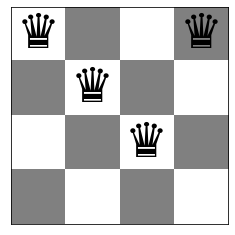

Queens (left to right) are at rows: [0 1 2 0]
Number of conflicts: 4


In [148]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


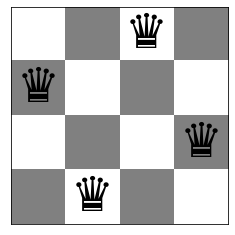

In [149]:
board = [1,3,0,2]
show_board(board)

## Steepest-ascend Hill Climbing Search [3 Points]

Calculate the objective function for all local moves (move each queen within its column) and always choose the best among all local moves.

Board with 4 conflicts.


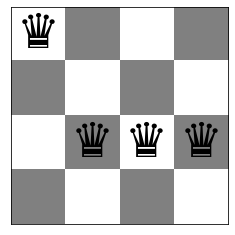

2 LESS CONFLICTS
1 LESS CONFLICTS
1 LESS CONFLICTS
Board with 0 conflicts.


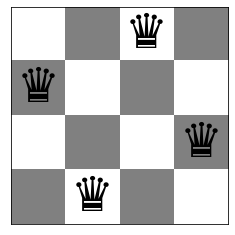

FINAL AMOUNT OF CONFLICTS: 0
Board with 0 conflicts.


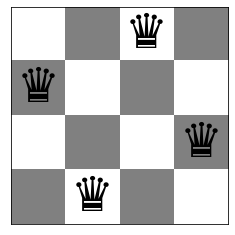

In [150]:
def SAHC(n=4, verb=False):
    board = random_board(n)
    if verb: show_board(board)
    conflictsV = conflicts(board)
    lowestConflicts = 0
    while lowestConflicts <= conflictsV:
        lowestConflicts = conflictsV
        changeRowToIndex = (-1, -1)
        for index, x in enumerate(board):
            og = (index, x)
            for i in range(n):
                board[index] = i
                if conflicts(board) < lowestConflicts:
                    changeRowToIndex = (index, i)
                    lowestConflicts = conflicts(board)
            board[og[0]] = og[1]
        if changeRowToIndex != (-1, -1):
            board[changeRowToIndex[0]] = changeRowToIndex[1]
            if verb: print("{} LESS CONFLICTS".format(conflictsV - conflicts(board)))
            conflictsV = conflicts(board)
        else:
            if verb: show_board(board)
            if verb: print("FINAL AMOUNT OF CONFLICTS:", conflicts(board))
            break
    if verb: show_board(board)
    return board

b = SAHC(verb=True)

Steepest Ascent Hill Climbing guarantees a local optimum but not a global optimum.

## Steepest-ascend Hill Climbing Search with Random Restarts [1 Point]

Steepest-ascend hill climbing will often end up in local optima. Restart the algorithm up to 100 times with a random board to find a better (hopefully optimal) solution.   

RESTART: 0
Board with 3 conflicts.


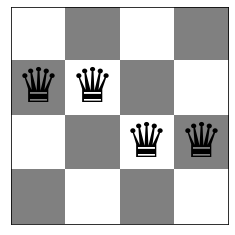

1 LESS CONFLICTS
1 LESS CONFLICTS
Board with 1 conflicts.


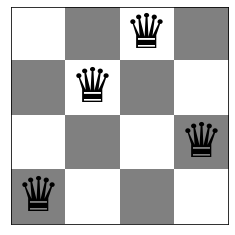

FINAL AMOUNT OF CONFLICTS: 1
Board with 1 conflicts.


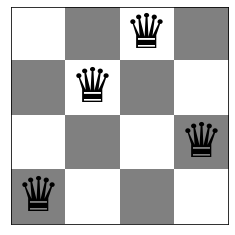

RESTART: 1
Board with 5 conflicts.


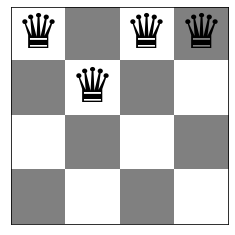

3 LESS CONFLICTS
1 LESS CONFLICTS
Board with 1 conflicts.


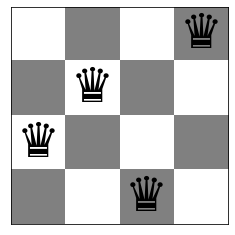

FINAL AMOUNT OF CONFLICTS: 1
Board with 1 conflicts.


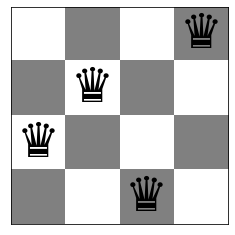

RESTART: 2
Board with 6 conflicts.


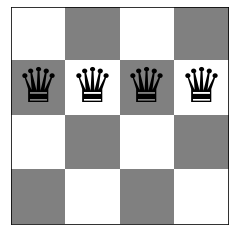

2 LESS CONFLICTS
2 LESS CONFLICTS
1 LESS CONFLICTS
Board with 1 conflicts.


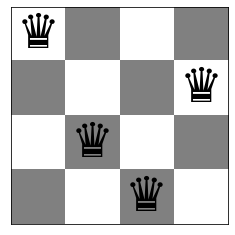

FINAL AMOUNT OF CONFLICTS: 1
Board with 1 conflicts.


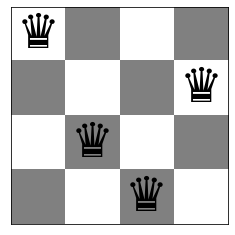

RESTART: 3
Board with 3 conflicts.


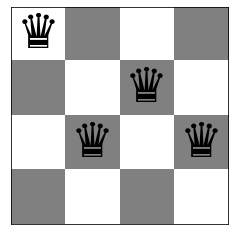

2 LESS CONFLICTS
Board with 1 conflicts.


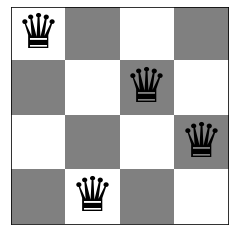

FINAL AMOUNT OF CONFLICTS: 1
Board with 1 conflicts.


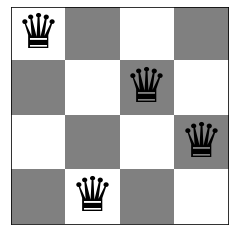

RESTART: 4
Board with 2 conflicts.


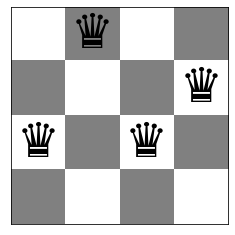

2 LESS CONFLICTS
Board with 0 conflicts.


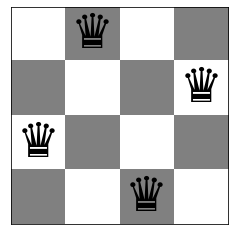

FINAL AMOUNT OF CONFLICTS: 0
Board with 0 conflicts.


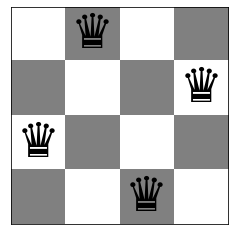

Board with 0 conflicts.


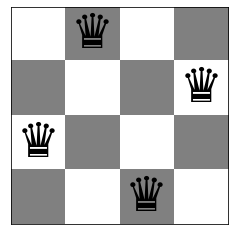

Board with 0 conflicts.


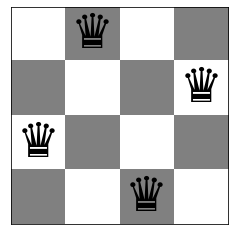

array([2, 0, 3, 1])

In [174]:
def SAHCRR(n=4, restarts=20, verb=False):
    '''Use random restarts after finding local optimum to reset board and try again until goal or matched steps is reached'''
    goal = 0 # no conflicts
    cheapestBoard = None
    allBoardScores = []
    allBoards = []
    minz = -1
    for i in range(restarts):
        if verb: print("RESTART:", i)
        returned = SAHC(n, verb)
        allBoards.append(returned)
        allBoardScores.append(conflicts(returned))
        if conflicts(returned) == 0:
            # found optimal board
            minz = i
            if verb: show_board(returned)
            break
    if minz != -1:
        smallest = minz
    else:
        smallest = allBoardScores.index(min(allBoardScores))
    if verb: show_board(returned)
    return allBoards[smallest]

SAHCRR(n=4, verb=True)

Similarly, while adding random restarts does not guarantee finding the global optimum it increases the chances dramatically because it is repeated trials of finding local optimum. 

## Stochastic Hill Climbing [1 Point]

Chooses randomly from among all uphill moves.

Board with 3 conflicts.


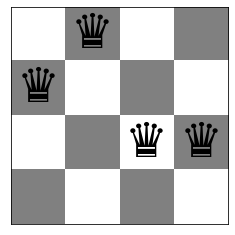

1 LESS CONFLICTS
Board with 2 conflicts.


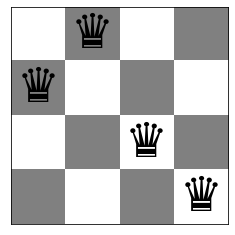

FINAL AMOUNT OF CONFLICTS: 2


array([1, 0, 2, 3])

In [152]:
def SHC(n=6, verb=False):
    '''Randomly choose from all improving moves until stuck'''
    board = random_board(n)
    if verb: show_board(board)
    conflictsV = conflicts(board)
    lowestConflicts = 0
    while lowestConflicts <= conflictsV:
        allImprovingMoves = []
        for index, x in enumerate(board):
            og = (index, x)
            for i in range(n):
                board[index] = i
                if conflicts(board) < conflictsV:
                    allImprovingMoves.append((index, i))
            board[og[0]] = og[1]
        if allImprovingMoves:
            # pick random tuple from list to adjust
            indexToLoc = np.random.choice(list(range(len(allImprovingMoves))))
            board[allImprovingMoves[indexToLoc][0]] = allImprovingMoves[indexToLoc][1]
            if verb: print("{} LESS CONFLICTS".format(conflictsV - conflicts(board)))
            conflictsV = conflicts(board)
            if conflictsV == 0:
                break
        else:
            if verb: show_board(board)
            if verb: print("FINAL AMOUNT OF CONFLICTS:", conflicts(board))
            break
    return board

SHC(n=4, verb=True)

Stochastic hill climbing randomly chooses from all uphill (improving) moves. Eventually, it reaches the global optimum or it gets stuck where no single queen movement can provide a better objective score. 

## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state.

Board with 6 conflicts.


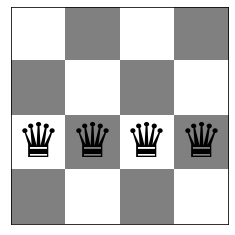

2 LESS CONFLICTS
2 LESS CONFLICTS
1 LESS CONFLICTS
Board with 1 conflicts.


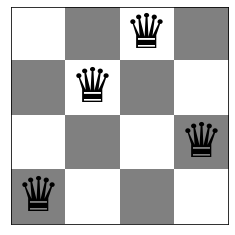

None
FINAL AMOUNT OF CONFLICTS: 1


array([3, 1, 0, 2])

In [153]:
def FCHC(n=3, maxIters=200, verb=False):
    '''Pick a random space and move if it improves the objective score'''
    board = random_board(n)
    if verb: show_board(board)
    conflictsV = conflicts(board)
    i = 0
    while True:
        index = np.random.randint(0, high=n)
        row = np.random.randint(0, high=n)
        og = (index, board[index]) #column then row
        board[index] = row
        if conflicts(board) < conflictsV:
            if verb: print("{} LESS CONFLICTS".format(conflictsV - conflicts(board)))
            conflictsV = conflicts(board)
        else:
            board[og[0]] = og[1]
        i += 1
        if conflictsV == 0 or i == maxIters:
            break
    if verb: print(show_board(board))
    if verb: print("FINAL AMOUNT OF CONFLICTS:", conflicts(board))
    return board
            
FCHC(n=4, verb=True)

First choice hill climbing works quickly by accepting the first generated uphill move. This can set it in local maxima that become impossible to escape when no single queen movement can generate a better objective score. 

## Simulated Annealing [2 Points]

You have to experiment with the annealing schedule.

Board with 6 conflicts.


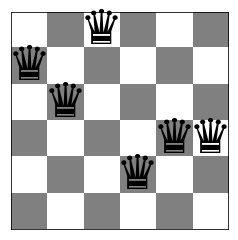

1 LESS CONFLICTS
Board with 5 conflicts.


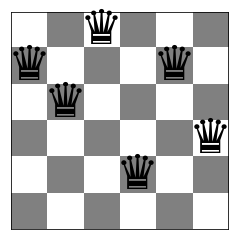

2 MORE CONFLICTS
Board with 7 conflicts.


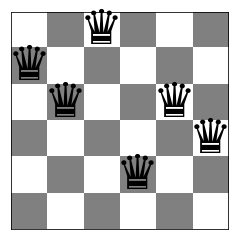

0 MORE CONFLICTS
Board with 7 conflicts.


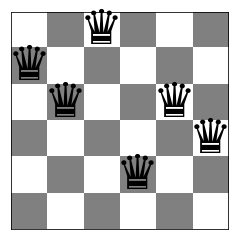

1 LESS CONFLICTS
Board with 6 conflicts.


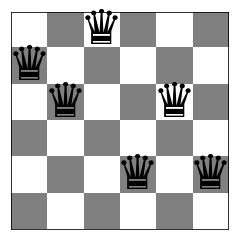

0 MORE CONFLICTS
Board with 6 conflicts.


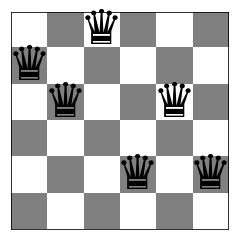

1 MORE CONFLICTS
Board with 7 conflicts.


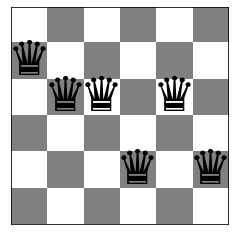

1 LESS CONFLICTS
Board with 6 conflicts.


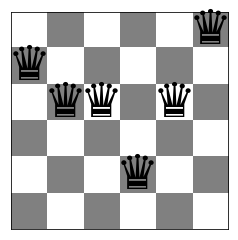

3 LESS CONFLICTS
Board with 3 conflicts.


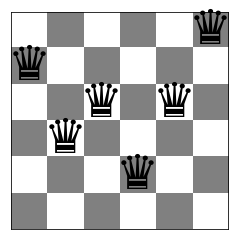

1 MORE CONFLICTS
Board with 4 conflicts.


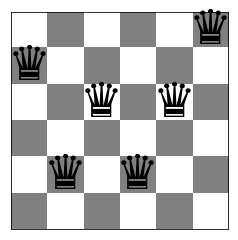

1 LESS CONFLICTS
Board with 3 conflicts.


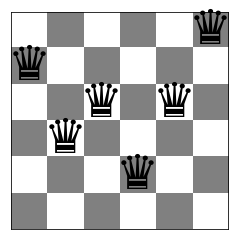

0 MORE CONFLICTS
Board with 3 conflicts.


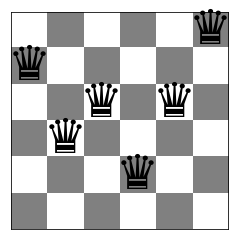

2 MORE CONFLICTS
Board with 5 conflicts.


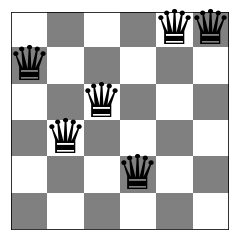

0 MORE CONFLICTS
Board with 5 conflicts.


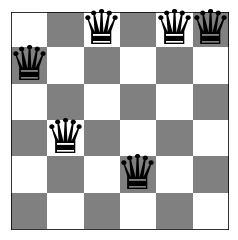

0 MORE CONFLICTS
Board with 5 conflicts.


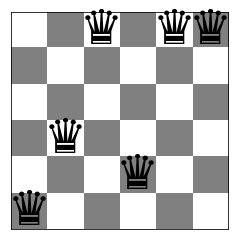

0 MORE CONFLICTS
Board with 5 conflicts.


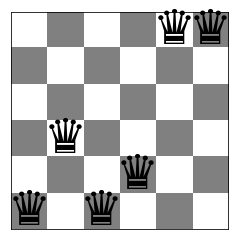

1 LESS CONFLICTS
Board with 4 conflicts.


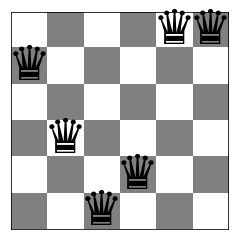

1 MORE CONFLICTS
Board with 5 conflicts.


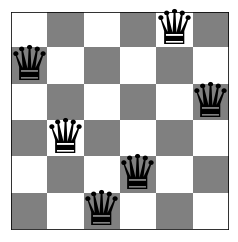

2 LESS CONFLICTS
Board with 3 conflicts.


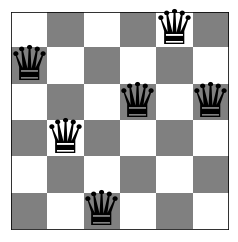

2 MORE CONFLICTS
Board with 5 conflicts.


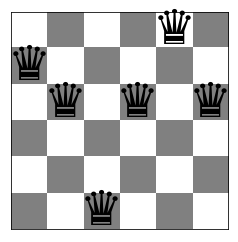

3 MORE CONFLICTS
Board with 8 conflicts.


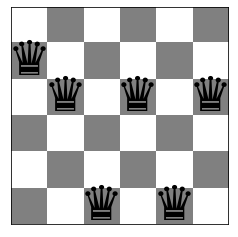

1 LESS CONFLICTS
Board with 7 conflicts.


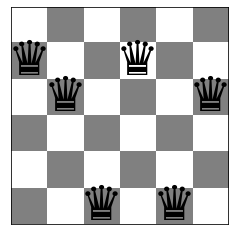

1 LESS CONFLICTS
Board with 6 conflicts.


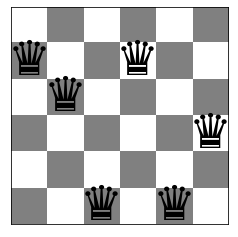

0 MORE CONFLICTS
Board with 6 conflicts.


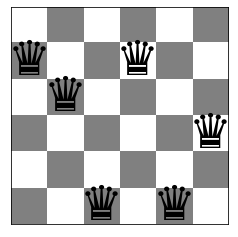

1 LESS CONFLICTS
Board with 5 conflicts.


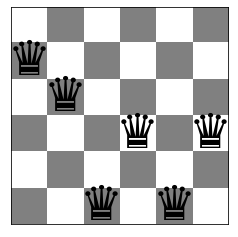

0 MORE CONFLICTS
Board with 5 conflicts.


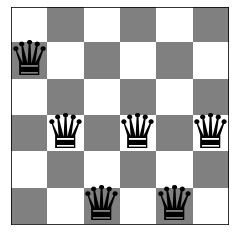

0 MORE CONFLICTS
Board with 5 conflicts.


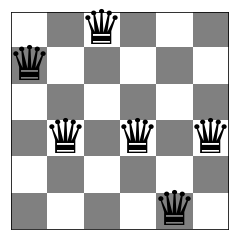

2 LESS CONFLICTS
Board with 3 conflicts.


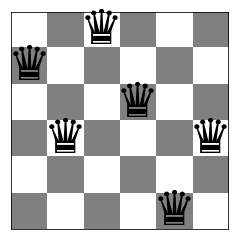

1 LESS CONFLICTS
Board with 2 conflicts.


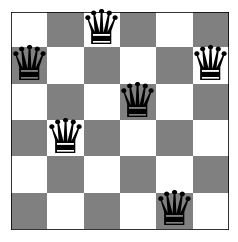

2 MORE CONFLICTS
Board with 4 conflicts.


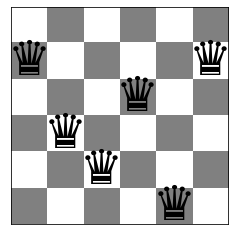

0 MORE CONFLICTS
Board with 4 conflicts.


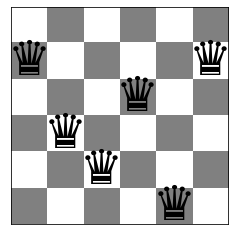

0 MORE CONFLICTS
Board with 4 conflicts.


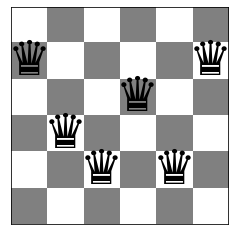

3 LESS CONFLICTS
Board with 1 conflicts.


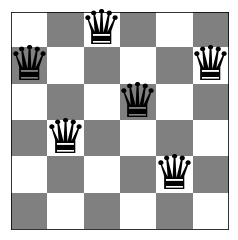

2 MORE CONFLICTS
Board with 3 conflicts.


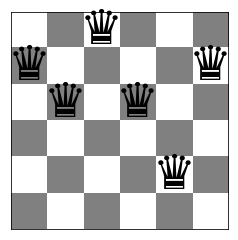

2 MORE CONFLICTS
Board with 5 conflicts.


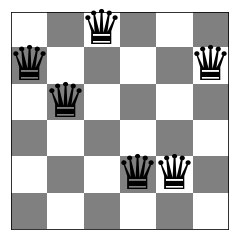

0 MORE CONFLICTS
Board with 5 conflicts.


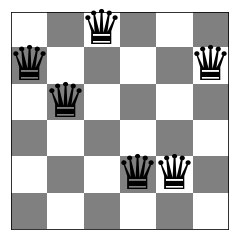

2 LESS CONFLICTS
Board with 3 conflicts.


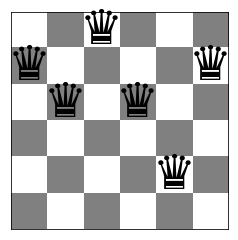

2 MORE CONFLICTS
Board with 5 conflicts.


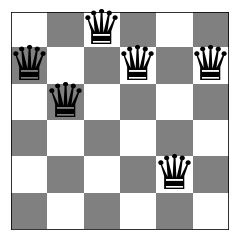

0 MORE CONFLICTS
Board with 5 conflicts.


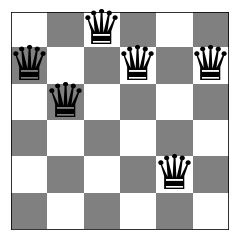

2 MORE CONFLICTS
Board with 7 conflicts.


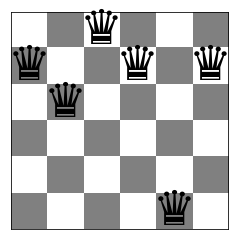

1 LESS CONFLICTS
Board with 6 conflicts.


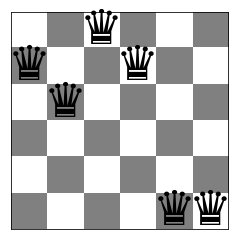

1 LESS CONFLICTS
Board with 5 conflicts.


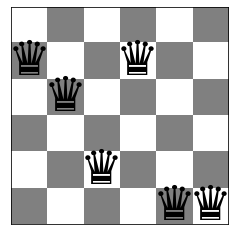

1 LESS CONFLICTS
Board with 4 conflicts.


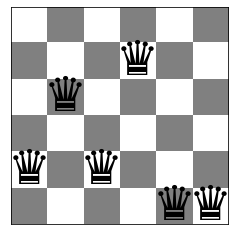

1 LESS CONFLICTS
Board with 3 conflicts.


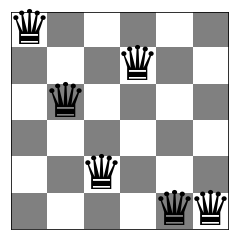

0 MORE CONFLICTS
Board with 3 conflicts.


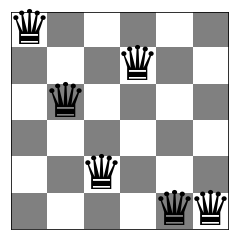

1 LESS CONFLICTS
Board with 2 conflicts.


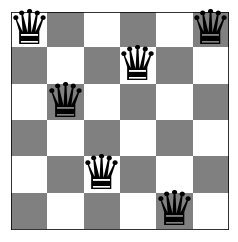

1 MORE CONFLICTS
Board with 3 conflicts.


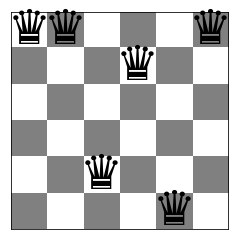

0 MORE CONFLICTS
Board with 3 conflicts.


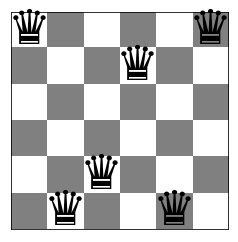

1 LESS CONFLICTS
Board with 2 conflicts.


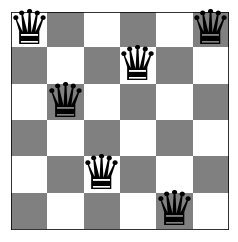

1 MORE CONFLICTS
Board with 3 conflicts.


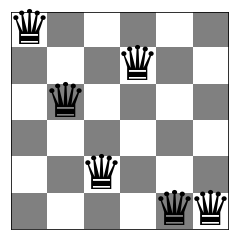

3 MORE CONFLICTS
Board with 6 conflicts.


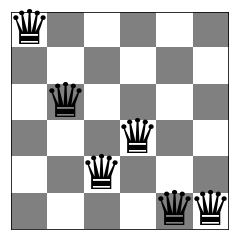

2 LESS CONFLICTS
Board with 4 conflicts.


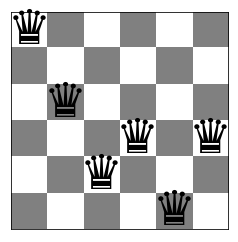

0 MORE CONFLICTS
Board with 4 conflicts.


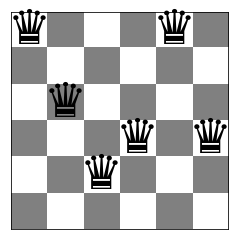

0 MORE CONFLICTS
Board with 4 conflicts.


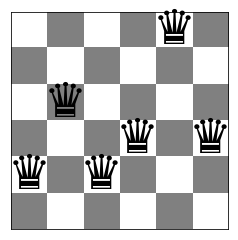

0 MORE CONFLICTS
Board with 4 conflicts.


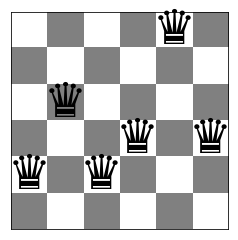

2 LESS CONFLICTS
Board with 2 conflicts.


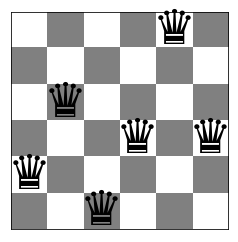

2 MORE CONFLICTS
Board with 4 conflicts.


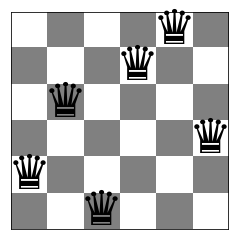

0 MORE CONFLICTS
Board with 4 conflicts.


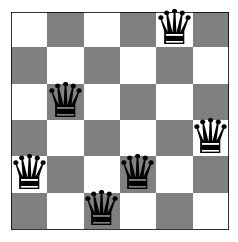

0 MORE CONFLICTS
Board with 4 conflicts.


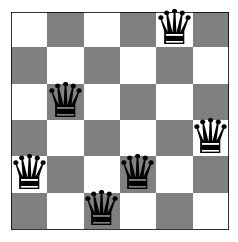

0 MORE CONFLICTS
Board with 4 conflicts.


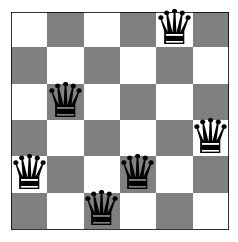

1 MORE CONFLICTS
Board with 5 conflicts.


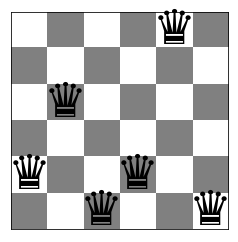

2 MORE CONFLICTS
Board with 7 conflicts.


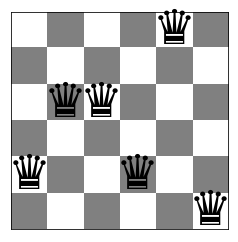

0 MORE CONFLICTS
Board with 7 conflicts.


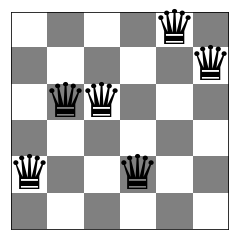

0 MORE CONFLICTS
Board with 7 conflicts.


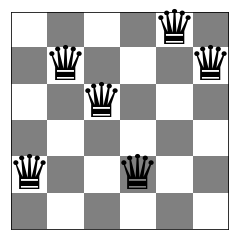

0 MORE CONFLICTS
Board with 7 conflicts.


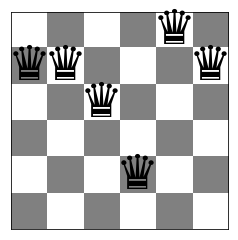

1 LESS CONFLICTS
Board with 6 conflicts.


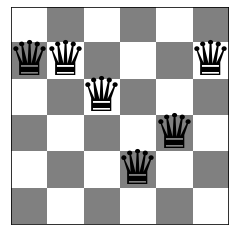

1 LESS CONFLICTS
Board with 5 conflicts.


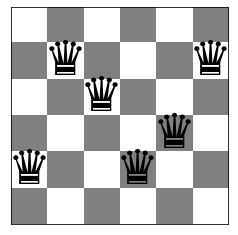

0 MORE CONFLICTS
Board with 5 conflicts.


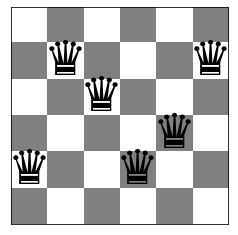

0 MORE CONFLICTS
Board with 5 conflicts.


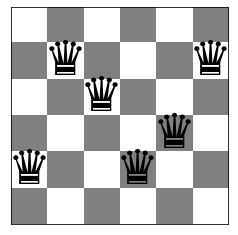

2 LESS CONFLICTS
Board with 3 conflicts.


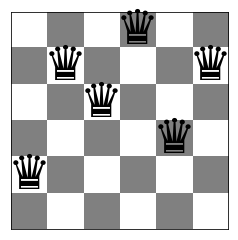

0 MORE CONFLICTS
Board with 3 conflicts.


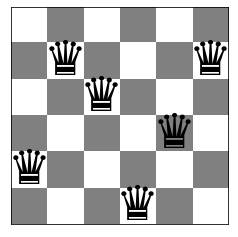

1 LESS CONFLICTS
Board with 2 conflicts.


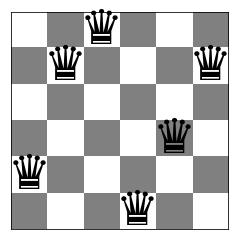

0 MORE CONFLICTS
Board with 2 conflicts.


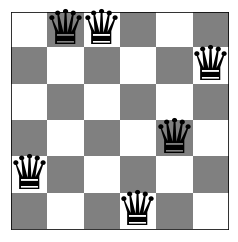

1 MORE CONFLICTS
Board with 3 conflicts.


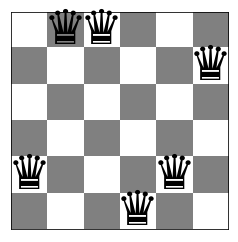

1 MORE CONFLICTS
Board with 4 conflicts.


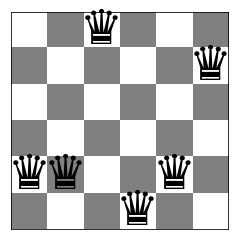

0 MORE CONFLICTS
Board with 4 conflicts.


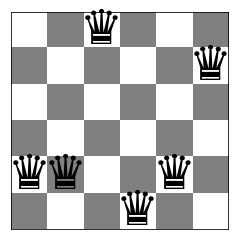

0 MORE CONFLICTS
Board with 4 conflicts.


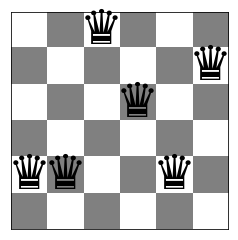

1 LESS CONFLICTS
Board with 3 conflicts.


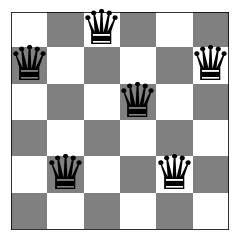

0 MORE CONFLICTS
Board with 3 conflicts.


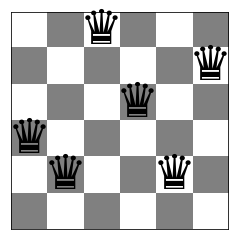

0 MORE CONFLICTS
Board with 3 conflicts.


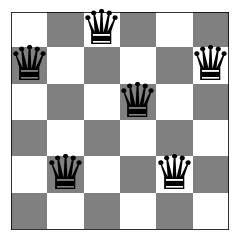

0 MORE CONFLICTS
Board with 3 conflicts.


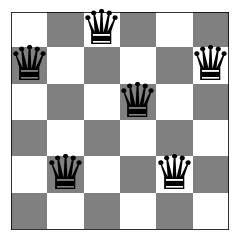

0 MORE CONFLICTS
Board with 3 conflicts.


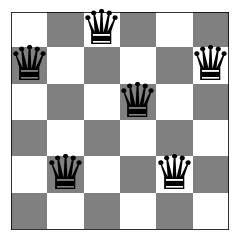

0 MORE CONFLICTS
Board with 3 conflicts.


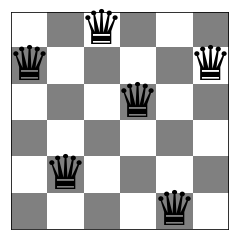

0 MORE CONFLICTS
Board with 3 conflicts.


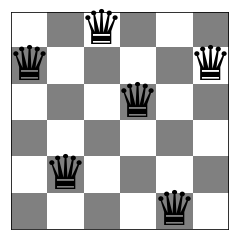

0 MORE CONFLICTS
Board with 3 conflicts.


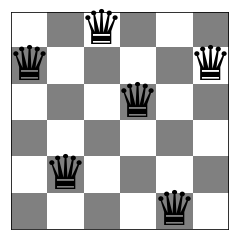

0 MORE CONFLICTS
Board with 3 conflicts.


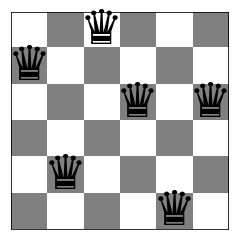

0 MORE CONFLICTS
Board with 3 conflicts.


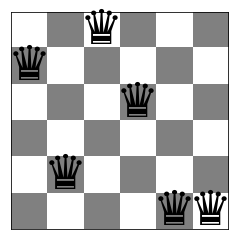

0 MORE CONFLICTS
Board with 3 conflicts.


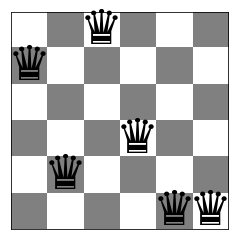

0 MORE CONFLICTS
Board with 3 conflicts.


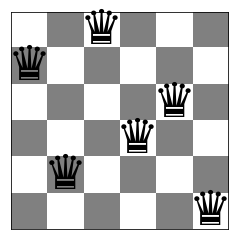

1 LESS CONFLICTS
Board with 2 conflicts.


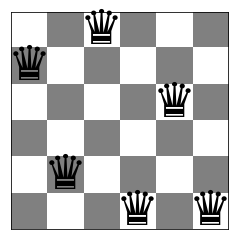

1 MORE CONFLICTS
Board with 3 conflicts.


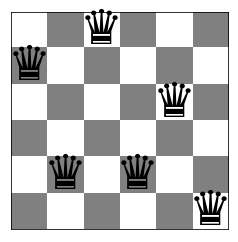

1 MORE CONFLICTS
Board with 4 conflicts.


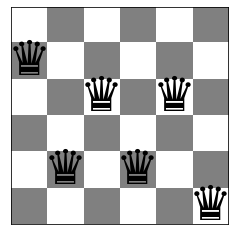

1 LESS CONFLICTS
Board with 3 conflicts.


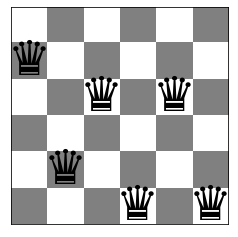

1 LESS CONFLICTS
Board with 2 conflicts.


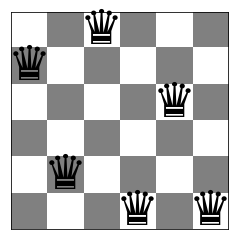

0 MORE CONFLICTS
Board with 2 conflicts.


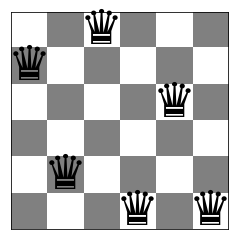

0 MORE CONFLICTS
Board with 2 conflicts.


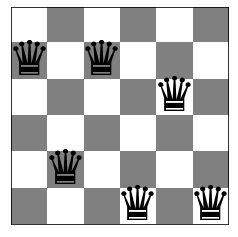

0 MORE CONFLICTS
Board with 2 conflicts.


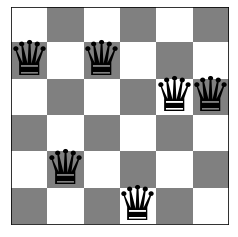

0 MORE CONFLICTS
Board with 2 conflicts.


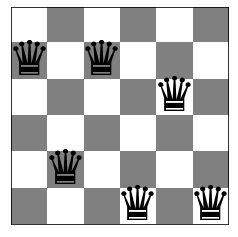

0 MORE CONFLICTS
Board with 2 conflicts.


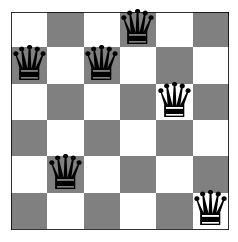

0 MORE CONFLICTS
Board with 2 conflicts.


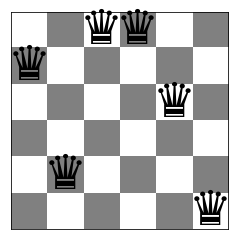

0 MORE CONFLICTS
Board with 2 conflicts.


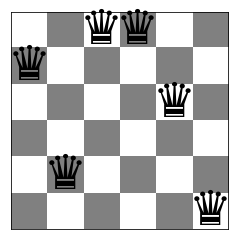

0 MORE CONFLICTS
Board with 2 conflicts.


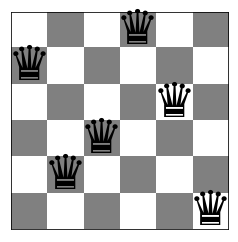

0 MORE CONFLICTS
Board with 2 conflicts.


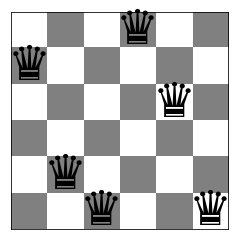

0 MORE CONFLICTS
Board with 2 conflicts.


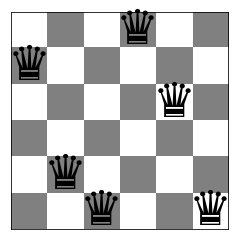

1 LESS CONFLICTS
Board with 1 conflicts.


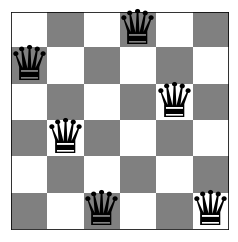

0 MORE CONFLICTS
Board with 1 conflicts.


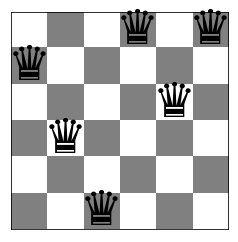

0 MORE CONFLICTS
Board with 1 conflicts.


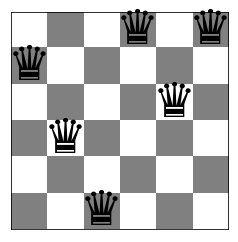

0 MORE CONFLICTS
Board with 1 conflicts.


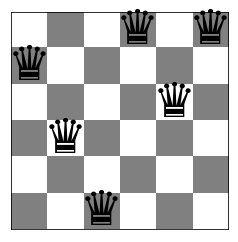

0 MORE CONFLICTS
Board with 1 conflicts.


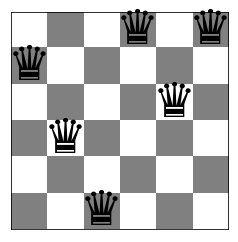

0 MORE CONFLICTS
Board with 1 conflicts.


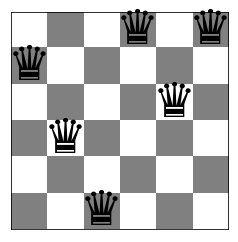

0 MORE CONFLICTS
Board with 1 conflicts.


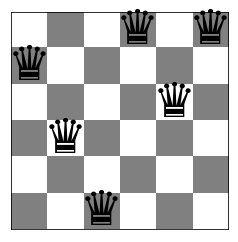

0 MORE CONFLICTS
Board with 1 conflicts.


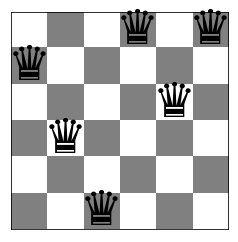

0 MORE CONFLICTS
Board with 1 conflicts.


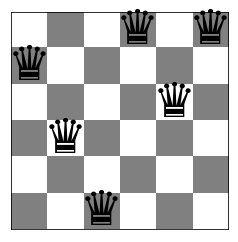

0 MORE CONFLICTS
Board with 1 conflicts.


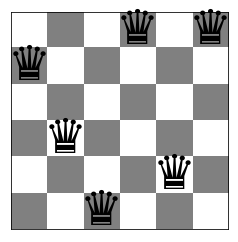

0 MORE CONFLICTS
Board with 1 conflicts.


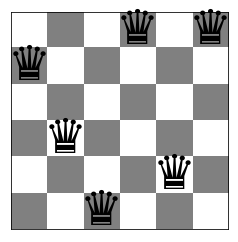

0 MORE CONFLICTS
Board with 1 conflicts.


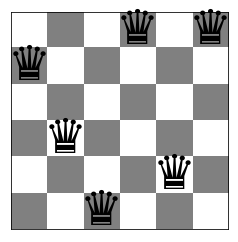

0 MORE CONFLICTS
Board with 1 conflicts.


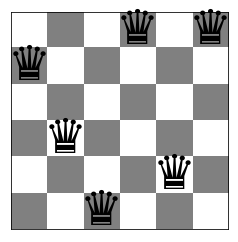

0 MORE CONFLICTS
Board with 1 conflicts.


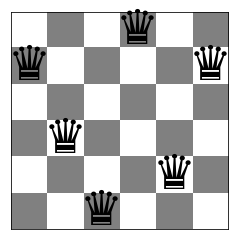

0 MORE CONFLICTS
Board with 1 conflicts.


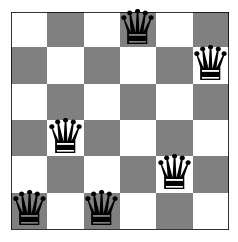

0 MORE CONFLICTS
Board with 1 conflicts.


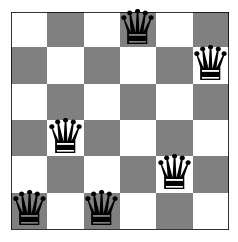

0 MORE CONFLICTS
Board with 1 conflicts.


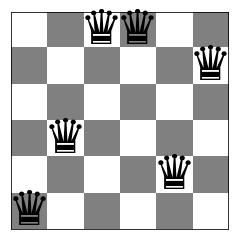

0 MORE CONFLICTS
Board with 1 conflicts.


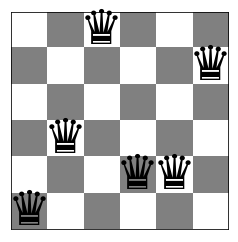

0 MORE CONFLICTS
Board with 1 conflicts.


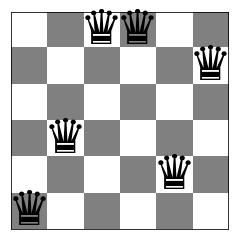

0 MORE CONFLICTS
Board with 1 conflicts.


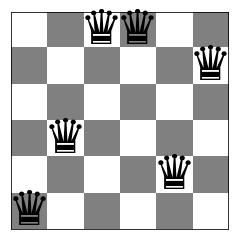

0 MORE CONFLICTS
Board with 1 conflicts.


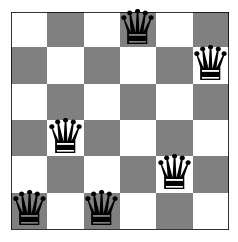

0 MORE CONFLICTS
Board with 1 conflicts.


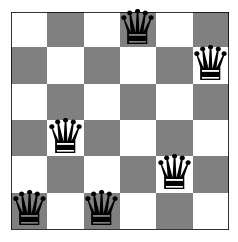

0 MORE CONFLICTS
Board with 1 conflicts.


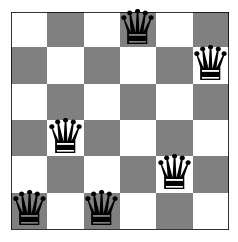

0 MORE CONFLICTS
Board with 1 conflicts.


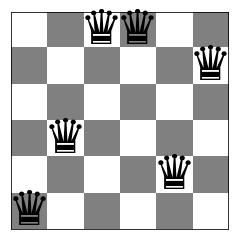

0 MORE CONFLICTS
Board with 1 conflicts.


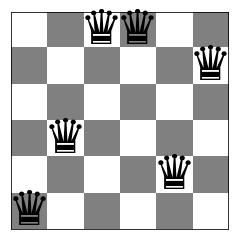

0 MORE CONFLICTS
Board with 1 conflicts.


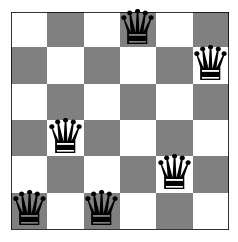

0 MORE CONFLICTS
Board with 1 conflicts.


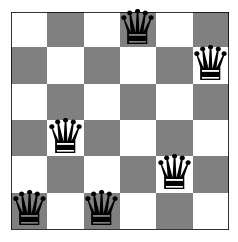

0 MORE CONFLICTS
Board with 1 conflicts.


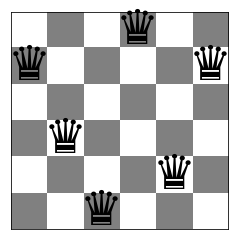

0 MORE CONFLICTS
Board with 1 conflicts.


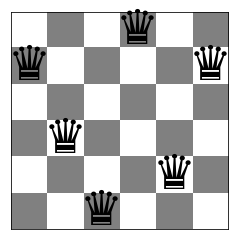

0 MORE CONFLICTS
Board with 1 conflicts.


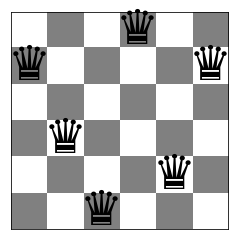

0 MORE CONFLICTS
Board with 1 conflicts.


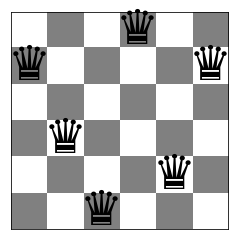

0 MORE CONFLICTS
Board with 1 conflicts.


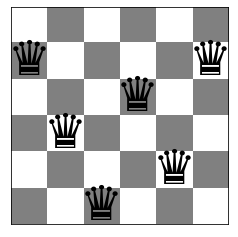

0 MORE CONFLICTS
Board with 1 conflicts.


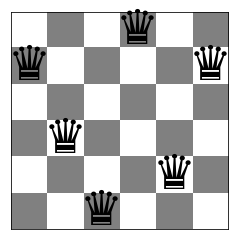

0 MORE CONFLICTS
Board with 1 conflicts.


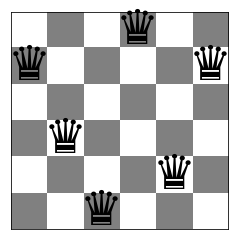

0 MORE CONFLICTS
Board with 1 conflicts.


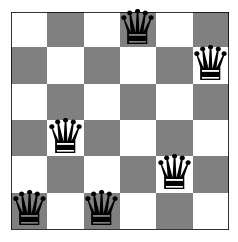

0 MORE CONFLICTS
Board with 1 conflicts.


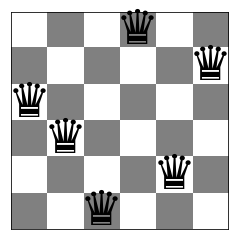

0 MORE CONFLICTS
Board with 1 conflicts.


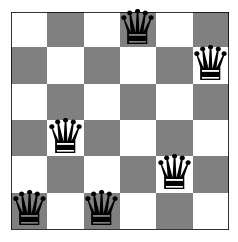

0 MORE CONFLICTS
Board with 1 conflicts.


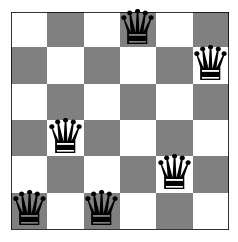

0 MORE CONFLICTS
Board with 1 conflicts.


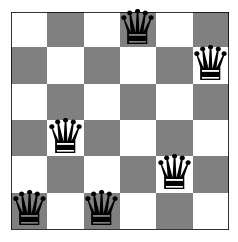

0 MORE CONFLICTS
Board with 1 conflicts.


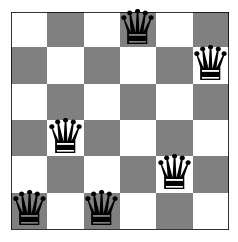

0 MORE CONFLICTS
Board with 1 conflicts.


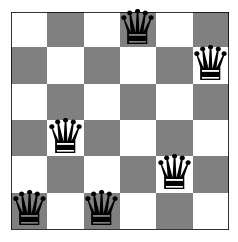

0 MORE CONFLICTS
Board with 1 conflicts.


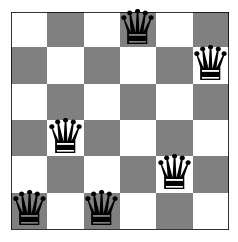

0 MORE CONFLICTS
Board with 1 conflicts.


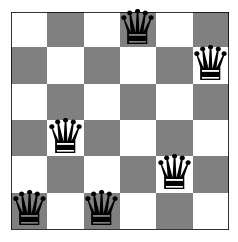

0 MORE CONFLICTS
Board with 1 conflicts.


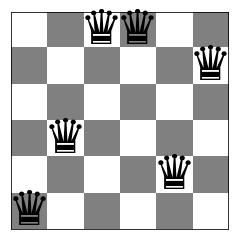

0 MORE CONFLICTS
Board with 1 conflicts.


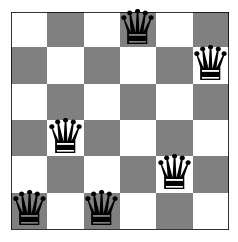

0 MORE CONFLICTS
Board with 1 conflicts.


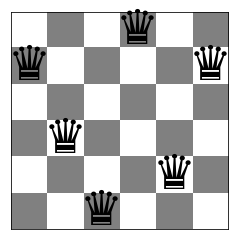

0 MORE CONFLICTS
Board with 1 conflicts.


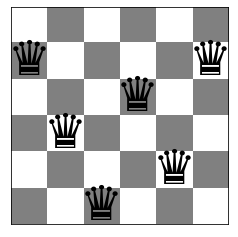

0 MORE CONFLICTS
Board with 1 conflicts.


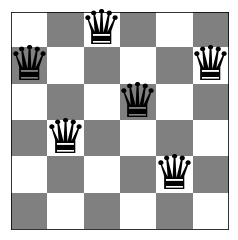

0 MORE CONFLICTS
Board with 1 conflicts.


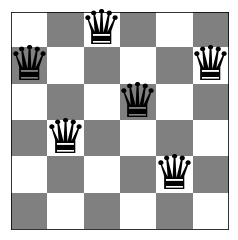

0 MORE CONFLICTS
Board with 1 conflicts.


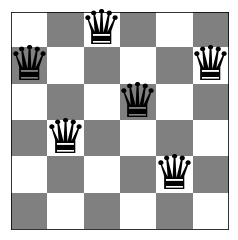

0 MORE CONFLICTS
Board with 1 conflicts.


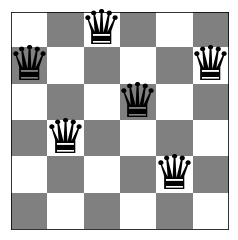

0 MORE CONFLICTS
Board with 1 conflicts.


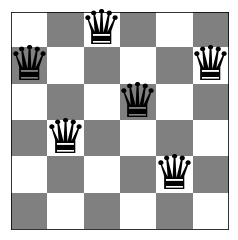

0 MORE CONFLICTS
Board with 1 conflicts.


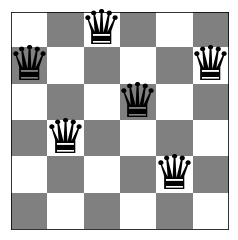

0 MORE CONFLICTS
Board with 1 conflicts.


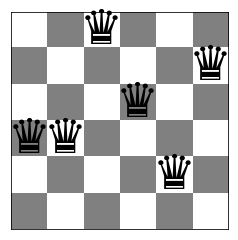

0 MORE CONFLICTS
Board with 1 conflicts.


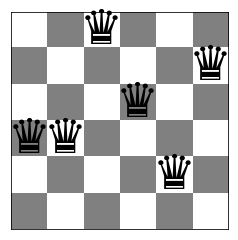

0 MORE CONFLICTS
Board with 1 conflicts.


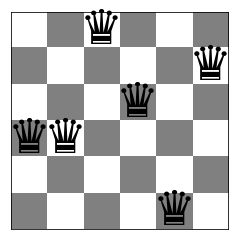

0 MORE CONFLICTS
Board with 1 conflicts.


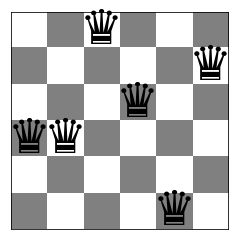

0 MORE CONFLICTS
Board with 1 conflicts.


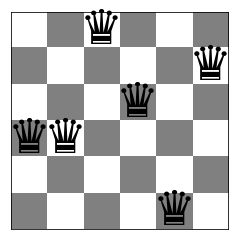

0 MORE CONFLICTS
Board with 1 conflicts.


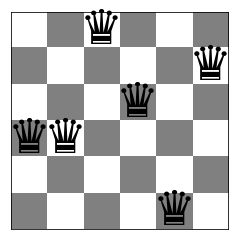

0 MORE CONFLICTS
Board with 1 conflicts.


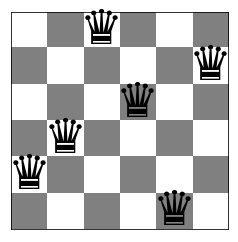

0 MORE CONFLICTS
Board with 1 conflicts.


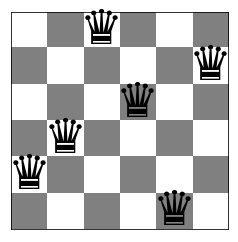

0 MORE CONFLICTS
Board with 1 conflicts.


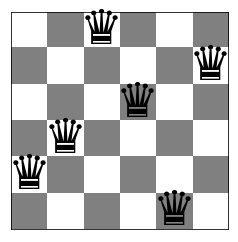

0 MORE CONFLICTS
Board with 1 conflicts.


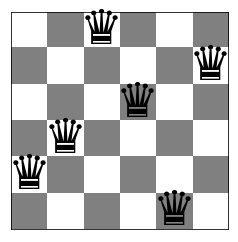

0 MORE CONFLICTS
Board with 1 conflicts.


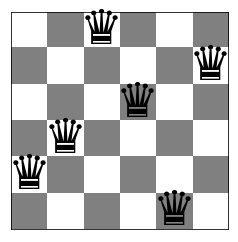

0 MORE CONFLICTS
Board with 1 conflicts.


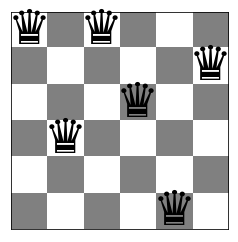

0 MORE CONFLICTS
Board with 1 conflicts.


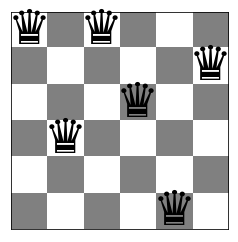

0 MORE CONFLICTS
Board with 1 conflicts.


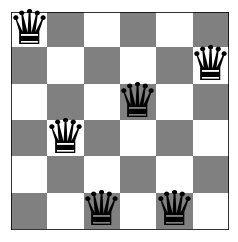

0 MORE CONFLICTS
Board with 1 conflicts.


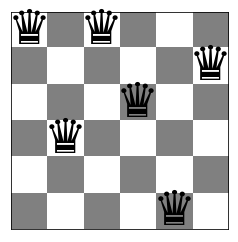

0 MORE CONFLICTS
Board with 1 conflicts.


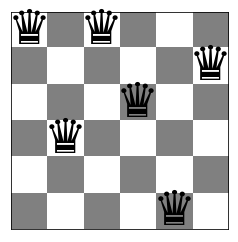

0 MORE CONFLICTS
Board with 1 conflicts.


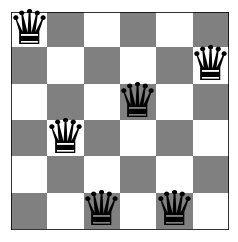

0 MORE CONFLICTS
Board with 1 conflicts.


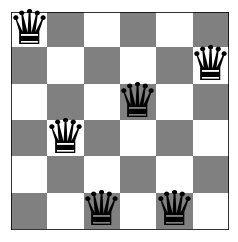

0 MORE CONFLICTS
Board with 1 conflicts.


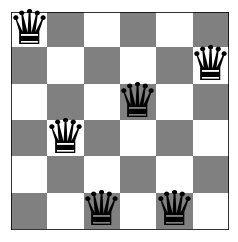

0 MORE CONFLICTS
Board with 1 conflicts.


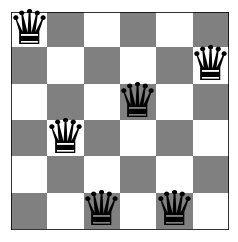

0 MORE CONFLICTS
Board with 1 conflicts.


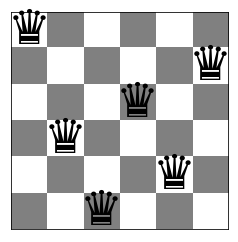

0 MORE CONFLICTS
Board with 1 conflicts.


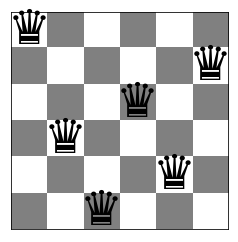

0 MORE CONFLICTS
Board with 1 conflicts.


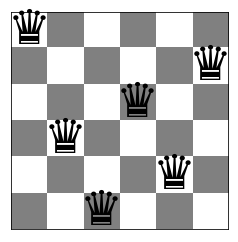

0 MORE CONFLICTS
Board with 1 conflicts.


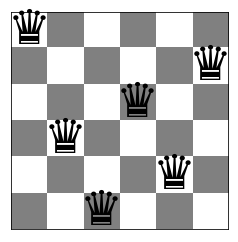

0 MORE CONFLICTS
Board with 1 conflicts.


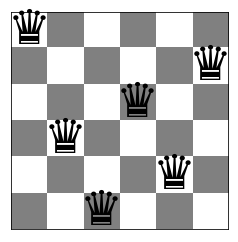

0 MORE CONFLICTS
Board with 1 conflicts.


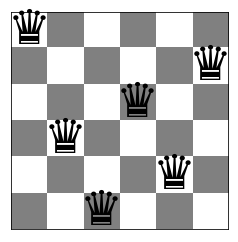

0 MORE CONFLICTS
Board with 1 conflicts.


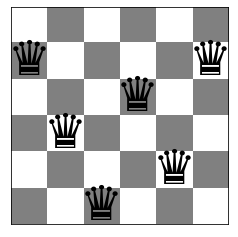

0 MORE CONFLICTS
Board with 1 conflicts.


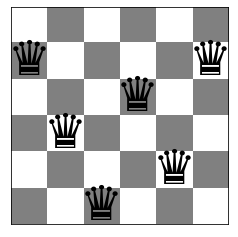

0 MORE CONFLICTS
Board with 1 conflicts.


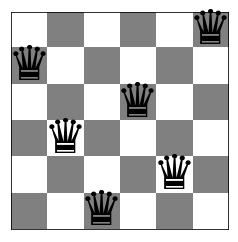

0 MORE CONFLICTS
Board with 1 conflicts.


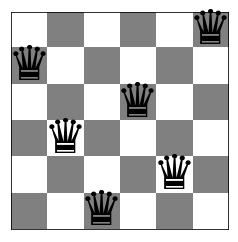

0 MORE CONFLICTS
Board with 1 conflicts.


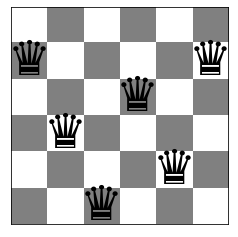

0 MORE CONFLICTS
Board with 1 conflicts.


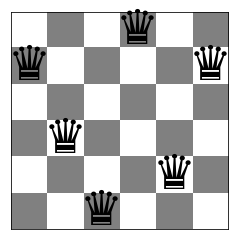

0 MORE CONFLICTS
Board with 1 conflicts.


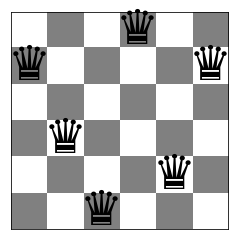

0 MORE CONFLICTS
Board with 1 conflicts.


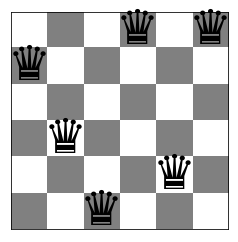

0 MORE CONFLICTS
Board with 1 conflicts.


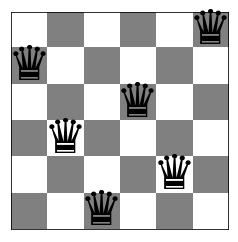

0 MORE CONFLICTS
Board with 1 conflicts.


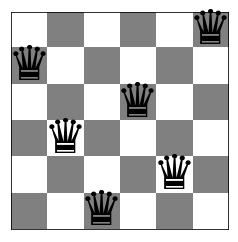

0 MORE CONFLICTS
Board with 1 conflicts.


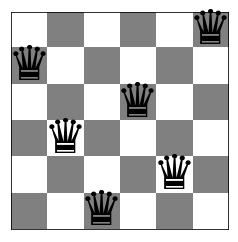

0 MORE CONFLICTS
Board with 1 conflicts.


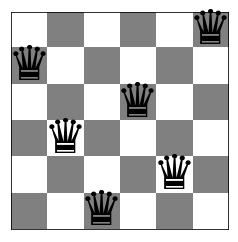

0 MORE CONFLICTS
Board with 1 conflicts.


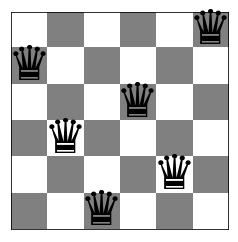

0 MORE CONFLICTS
Board with 1 conflicts.


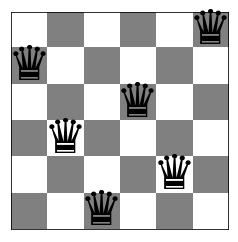

0 MORE CONFLICTS
Board with 1 conflicts.


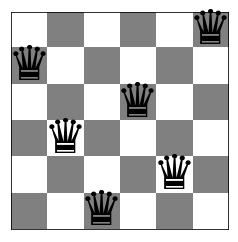

0 MORE CONFLICTS
Board with 1 conflicts.


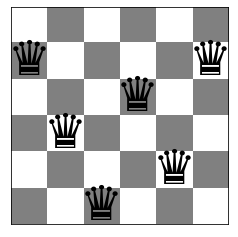

0 MORE CONFLICTS
Board with 1 conflicts.


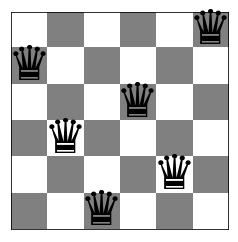

0 MORE CONFLICTS
Board with 1 conflicts.


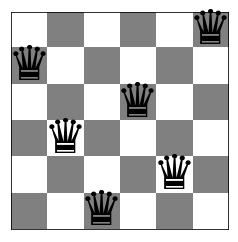

0 MORE CONFLICTS
Board with 1 conflicts.


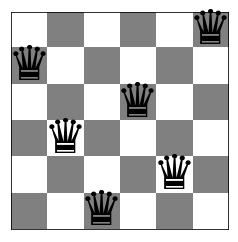

0 MORE CONFLICTS
Board with 1 conflicts.


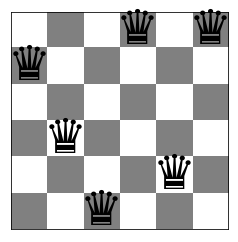

0 MORE CONFLICTS
Board with 1 conflicts.


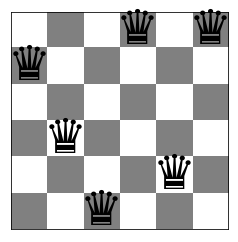

0 MORE CONFLICTS
Board with 1 conflicts.


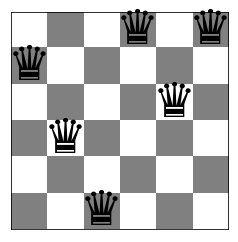

0 MORE CONFLICTS
Board with 1 conflicts.


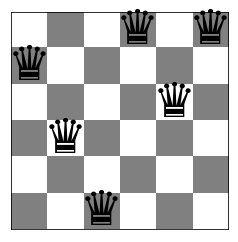

0 MORE CONFLICTS
Board with 1 conflicts.


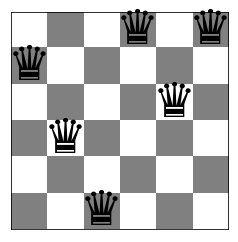

0 MORE CONFLICTS
Board with 1 conflicts.


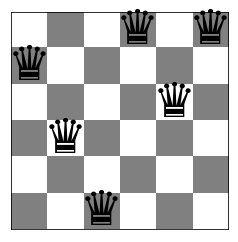

1 LESS CONFLICTS
Board with 0 conflicts.


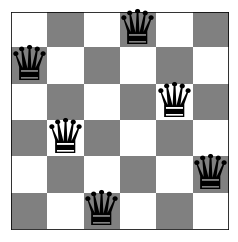

STEPS: 525
Board with 0 conflicts.


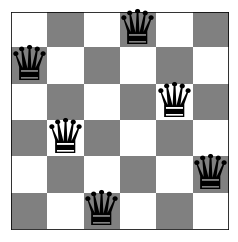

None
FINAL AMOUNT OF CONFLICTS: 0


array([1, 3, 5, 0, 2, 4])

In [154]:
def simulatedAnnealing(n=4, verb=False):
    '''Pick a random move and make move if it improves the objective 
    score or meets threshold of scheduling function'''
    board = random_board(n)
    if verb: show_board(board)
    conflictsV = conflicts(board)
    lowerLimit = 1E-6
    i = 0 # steps counter
    while conflicts(board) != 0:
        # get temperature
        T = schedule(i)
        if T < lowerLimit:
            break
        # get neighbor move
        index = np.random.randint(0, high=n)
        row = np.random.randint(0, high=n)
        og = (index, board[index]) #column then row
        board[index] = row
        E = conflicts(board) - conflictsV
        if E < 0: # if improving move, take it
            conflictsV = conflicts(board)
            if verb: print("{} LESS CONFLICTS".format(E*-1))
            if verb: show_board(board)
        elif np.exp((E*-1)/T) > np.random.rand(): # if move fits condition take downhill move
            conflictsV = conflicts(board)
            if verb: print("{} MORE CONFLICTS".format(E))
            if verb: show_board(board)
        else: # set board back to original position if it does not meet conditions
            board[og[0]] = og[1]
        i += 1
    if verb: print("STEPS:", i)
    if verb: print(show_board(board))
    if verb: print("FINAL AMOUNT OF CONFLICTS:", conflicts(board))
    return board

def schedule(i):
    # temperature schedule function
    const = 5 
    alpha = .98
    return const * (alpha**i)

simulatedAnnealing(n=6, verb=True)

Simmulated annealing improves our ability to escape local optima by offering a scheduling function that accepts downhill moves based on a random probability, the amount of steps used already in the program, and a hard coded scheduling function. Simmulated anneling does not gurantee the global maximum.

## Compare Performance [2 Points]

Use runtime, scalability, and best objective function value to compare the algorithms on boards of different sizes.  

For timing you can use the `time` package.

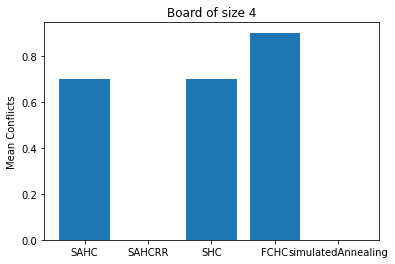

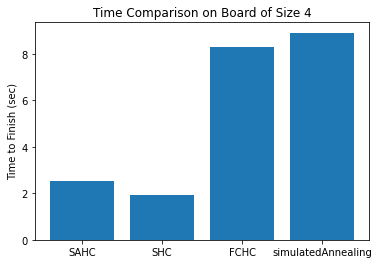

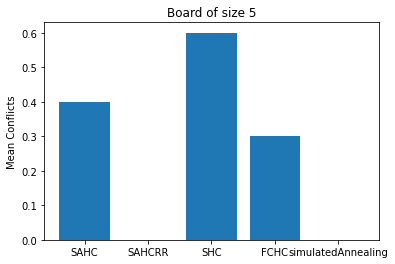

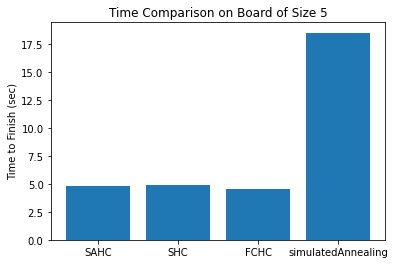

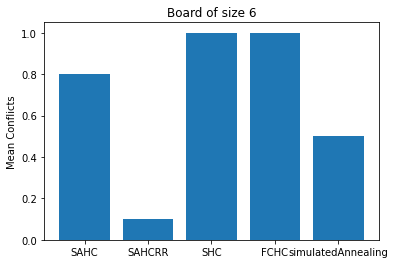

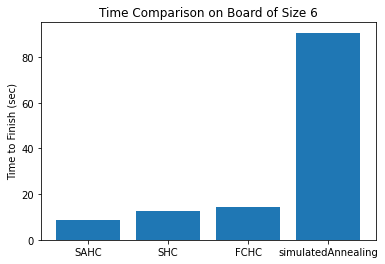

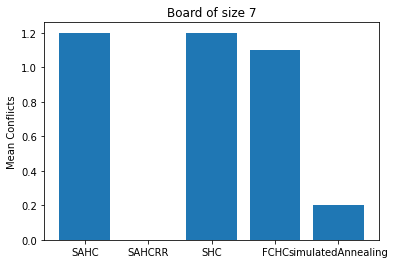

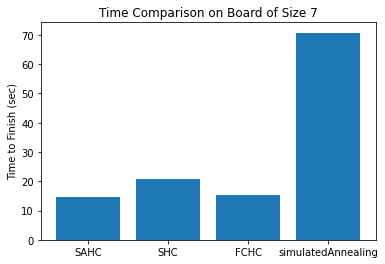

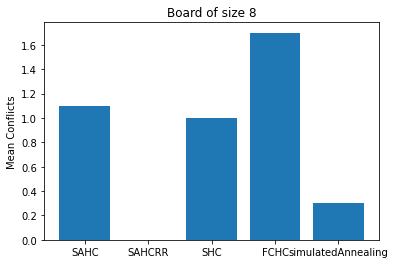

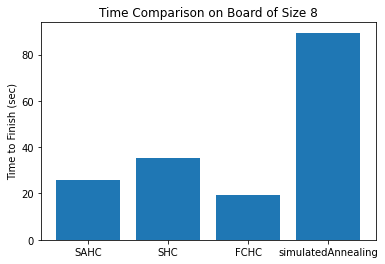

SLOPE: 5.631506443023681
Y-INT: -22.46474266052245
R-SQUARED: 0.916990429430511


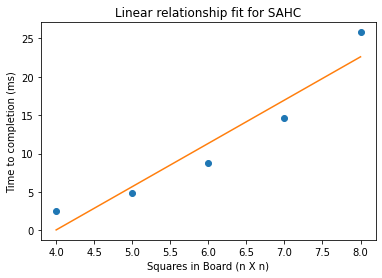

SLOPE: 28.724389076232907
Y-INT: -121.25808238983151
R-SQUARED: 0.8276787234646893


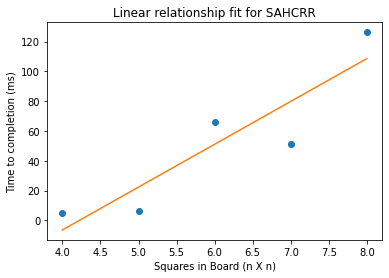

SLOPE: 8.27869892120361
Y-INT: -34.58974838256833
R-SQUARED: 0.9424799375575456


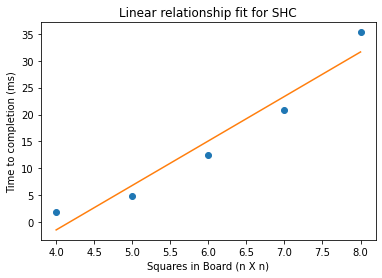

SLOPE: 3.3048200607299787
Y-INT: -7.386898994445788
R-SQUARED: 0.7736544934505208


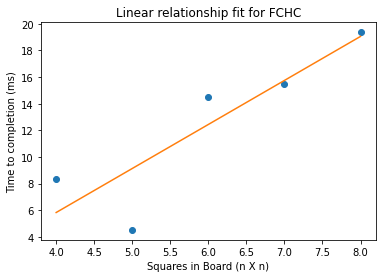

SLOPE: 21.33383512496948
Y-INT: -72.34823703765866
R-SQUARED: 0.7386262166703147


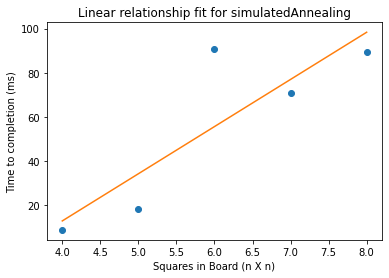

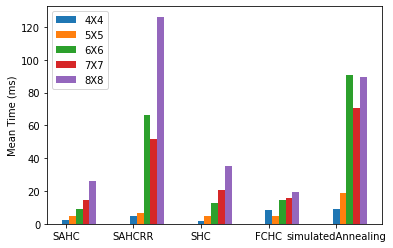

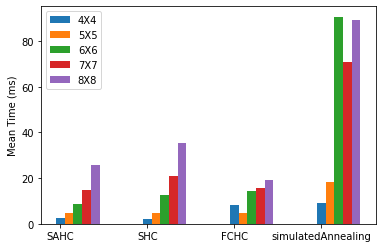

In [192]:
import time

def simulation():
    '''Compare each algorithm to each other and see respective trends in each implementation'''
    algos = [SAHC, SAHCRR, SHC, FCHC, simulatedAnnealing]

    dataBoards = []
    dataTimes = []
    dataScores = []
    rangeNxN = range(4, 9)
    
    legend = []
    for n in rangeNxN:
        legend.append('{}X{}'.format(n, n))
    
    allData = []
    
    # gather data on boards in size range above on conflicts and timing
    for n in rangeNxN:
        times = []
        boards = []
        boardScores = []
        meanTimes = []
        for func in algos:
            # run X times for each algo 
            boardsList = []
            conflictsList = []
            algoToTimes = []
            for iter in range(10):
                t0 = time.time()
                finalBoard = func(n=n, verb=False)
                t1 = time.time()
                boardsList.append(finalBoard)
                conflictsList.append(conflicts(finalBoard))
                algoToTimes.append((t1-t0)*1e3)
            times.append(algoToTimes)
            boards.append(boardsList)
            boardScores.append(conflictsList)
            meanTimes.append(np.mean(times[-1]))
        
        dataBoards.append(boards)
        dataTimes.append(times)
        dataScores.append(boardScores)
        allData.append(meanTimes)
        
    count = 4
    # review data based on size of each board and compare like sizes based on algorithm
    for nxnBoard, nxnTime, nxnConflicts in zip(dataBoards, dataTimes, dataScores):
        conf = np.array(nxnConflicts)

        conflicz = [np.mean(con) for con in conf]
        yPos = np.arange(len(algos))
        plt.bar(yPos, conflicz)
        xLabel = [algo.__name__ for algo in algos]
        plt.xticks(yPos, xLabel)
        plt.ylabel('Mean Conflicts')
        plt.title('Board of size {}'.format(count))
        plt.show()

        times = [np.mean(t) for t in nxnTime]
        yPos = np.arange(len(algos) - 1)
        SAHCRRV = times.pop(1)
        plt.bar(yPos, times)    
        xLabel.pop(1)
        plt.xticks(yPos, xLabel)
        plt.ylabel('Time to Finish (sec)')
        plt.title('Time Comparison on Board of Size {}'.format(count))
        plt.show() 
        
        count += 1
    
    # transpose all of allData to find trends in each algorithm respectively
    df = np.array(allData)
    dfT = df.T
    sqInBoard = np.array([n for n in rangeNxN])
    for algoData, algo in zip(dfT, algos):
        plt.plot(sqInBoard, algoData, 'o')
        m, b = np.polyfit(sqInBoard, algoData, 1)
        plt.plot(sqInBoard, m*sqInBoard + b)
        plt.ylabel('Time to completion (ms)')
        plt.xlabel('Squares in Board (n X n)')
        plt.title('Linear relationship fit for {}'.format(algo.__name__))
        correlation_matrix = np.corrcoef(sqInBoard, algoData)
        correlation_xy = correlation_matrix[0,1]
        r_squared = correlation_xy**2
        print("SLOPE: {}".format(m))
        print("Y-INT: {}".format(b))
        print("R-SQUARED: {}".format(r_squared))
        plt.show()    
    
    # view all time data aggregated 
    offset = 0
    for size in allData:
        yP = np.arange(len(algos))
        plt.bar(yP + offset, size, width=.1)
        offset += .1
    plt.xticks(yP, [algo.__name__ for algo in algos])
    plt.ylabel('Mean Time (ms)')
    plt.legend(legend)
    plt.show()
    
    # the same charts but without SAHC with Random Restarts
    offset = 0
    for size in allData:
        size.pop(1)
        yP = np.arange(len(algos) - 1)
        plt.bar(yP + offset, size, width=.1)
        offset += .1
    plt.xticks(yP, xLabel)
    plt.ylabel('Mean Time (ms)')
    plt.legend(legend)
    plt.show()
    
    
    
    
simulation()

Given the analysis performed above, we can very easily that the most time consuming but effective in reaching the optimal state is the Steepest Ascent Hill Climbing (SAHC) algorithm with Random Restarts. This is largely because it is simply rerunning the SAHC algorithm for a specified amount of iterations that breaks once it generates a board with no conflicts. 

As seen with the linear fits on each algorithm, the only algorithms that follow such a linear trend with an R-Squared value above .90 are SAHC and Stochastic Hill Climbing (SHC). First Choice Hill Climbing (FCHC), Simulated Annealing, and SAHC with RR do not follow linear trends because they reach their goals much more randomly. It is largely based on chance how each of those algorithms finishes thus showing time fluctuates significantly even as the board size increases. 

One important aspect to note is that each of these algorithms time to completion changes notably even on the same size boards. This high standard deviation could be skewing our judgement of the algorithm. This is why it is important to run each algorithm multiple times and record the mean value for both time and amount of conflicts on the board.

Each algorithm has a mean conflict value of normally 1 or less, indicating that each algorithm is effective in finding local optimum on the board but is subject to becoming stuck in said local optima. The main exception to the returned conflicts is that algorithms such as FCHC and SHC can get stuck in bad local optima because the following moves cannot improve its situation. The mean value of returned boards tells us that as board size increases, the algorithm performance (repective to conflicts on the board) does not change.

## Bonus: Genetic Algorithm [+1 Point]

FITNESS: [3, 2, 4, 3]
Board:  0
Board with 3 conflicts.


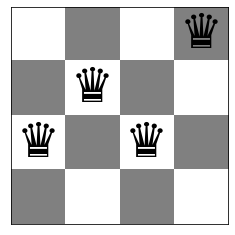

Board:  1
Board with 4 conflicts.


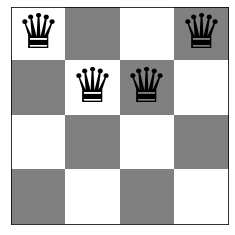

Board:  2
Board with 2 conflicts.


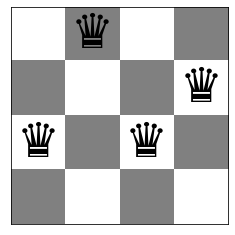

Board:  3
Board with 3 conflicts.


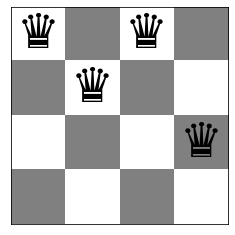

NORMALIZED: [0.25, 0.16666666666666666, 0.3333333333333333, 0.25]
SELECTION: [3, 1, 3, 0]
SELECTED: [array([0, 1, 0, 2]), array([0, 1, 1, 0]), array([0, 1, 0, 2]), array([2, 1, 2, 0])]
[(array([0, 1, 0, 2]), array([0, 1, 1, 0])), (array([2, 1, 2, 0]), array([0, 1, 0, 2]))]
Board with 2 conflicts.


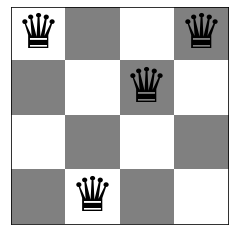

Board with 3 conflicts.


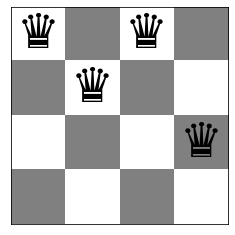

Board with 4 conflicts.


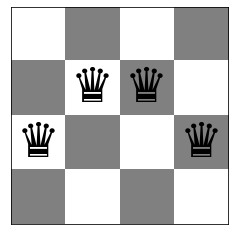

Board with 3 conflicts.


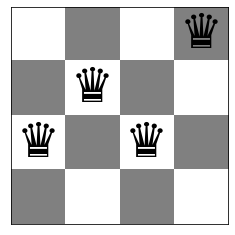

FITNESS: [4, 3, 2, 3]
Board:  0
Board with 2 conflicts.


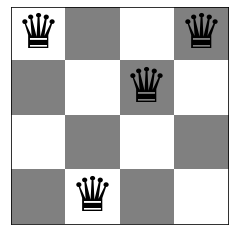

Board:  1
Board with 3 conflicts.


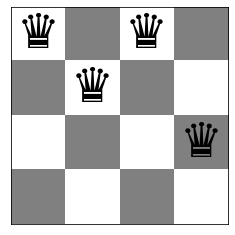

Board:  2
Board with 4 conflicts.


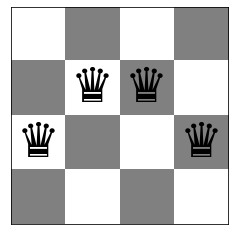

Board:  3
Board with 3 conflicts.


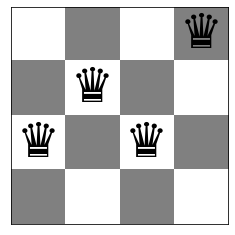

NORMALIZED: [0.3333333333333333, 0.25, 0.16666666666666666, 0.25]
SELECTION: [2, 2, 1, 2]
SELECTED: [array([2, 1, 1, 2]), array([2, 1, 1, 2]), array([0, 1, 0, 2]), array([2, 1, 1, 2])]
[(array([2, 1, 1, 2]), array([2, 1, 1, 2])), (array([2, 1, 1, 2]), array([0, 1, 0, 2]))]
Board with 4 conflicts.


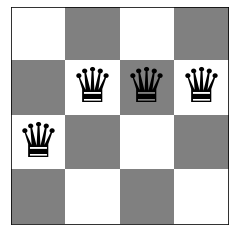

Board with 3 conflicts.


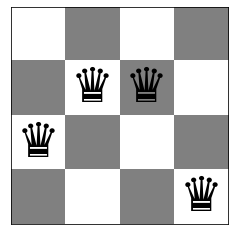

Board with 4 conflicts.


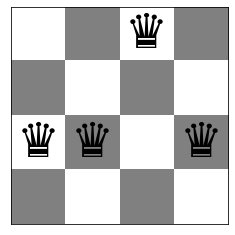

Board with 4 conflicts.


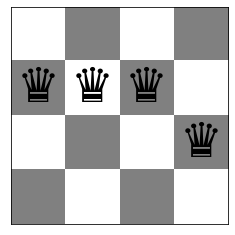

FITNESS: [2, 3, 2, 2]
Board:  0
Board with 4 conflicts.


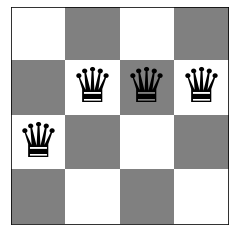

Board:  1
Board with 3 conflicts.


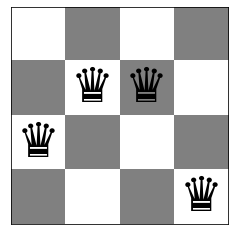

Board:  2
Board with 4 conflicts.


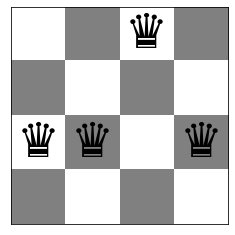

Board:  3
Board with 4 conflicts.


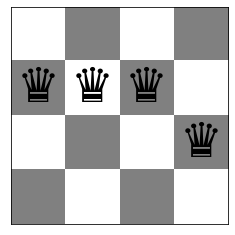

NORMALIZED: [0.2222222222222222, 0.3333333333333333, 0.2222222222222222, 0.2222222222222222]
SELECTION: [1, 2, 2, 2]
SELECTED: [array([2, 1, 1, 3]), array([2, 2, 0, 2]), array([2, 2, 0, 2]), array([2, 2, 0, 2])]
[(array([2, 2, 0, 2]), array([2, 1, 1, 3])), (array([2, 2, 0, 2]), array([2, 2, 0, 2]))]
Board with 3 conflicts.


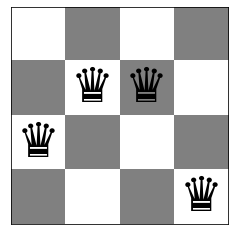

Board with 4 conflicts.


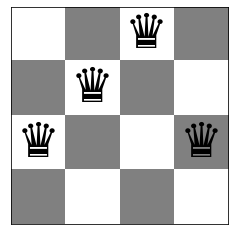

Board with 4 conflicts.


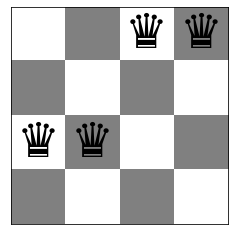

Board with 4 conflicts.


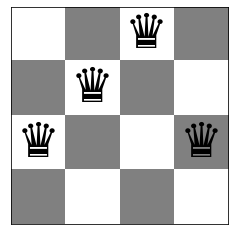

FITNESS: [3, 2, 2, 2]
Board:  0
Board with 3 conflicts.


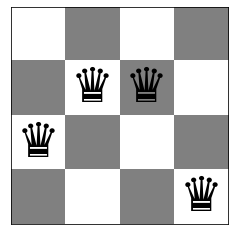

Board:  1
Board with 4 conflicts.


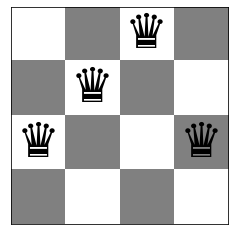

Board:  2
Board with 4 conflicts.


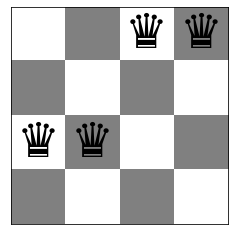

Board:  3
Board with 4 conflicts.


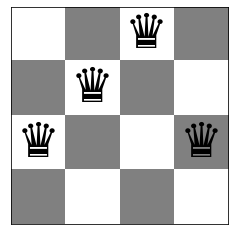

NORMALIZED: [0.3333333333333333, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222]
SELECTION: [0, 2, 2, 3]
SELECTED: [array([2, 1, 1, 3]), array([2, 2, 0, 0]), array([2, 2, 0, 0]), array([2, 1, 0, 2])]
[(array([2, 2, 0, 0]), array([2, 2, 0, 0])), (array([2, 1, 1, 3]), array([2, 1, 0, 2]))]
Board with 4 conflicts.


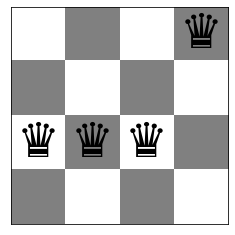

Board with 4 conflicts.


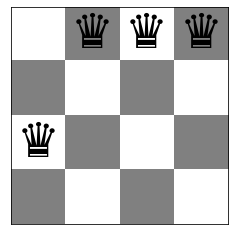

Board with 4 conflicts.


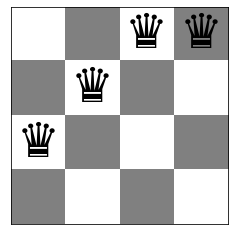

Board with 1 conflicts.


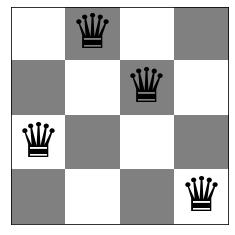

FITNESS: [2, 2, 2, 5]
Board:  0
Board with 4 conflicts.


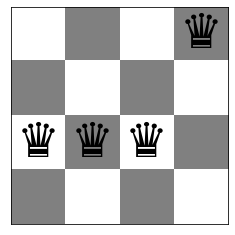

Board:  1
Board with 4 conflicts.


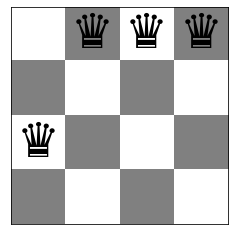

Board:  2
Board with 4 conflicts.


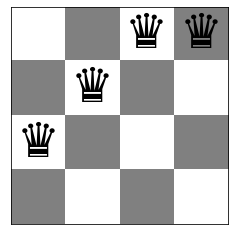

Board:  3
Board with 1 conflicts.


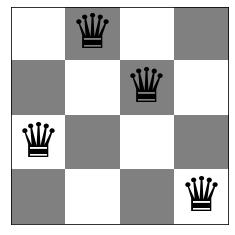

NORMALIZED: [0.18181818181818182, 0.18181818181818182, 0.18181818181818182, 0.45454545454545453]
SELECTION: [2, 3, 3, 1]
SELECTED: [array([2, 1, 0, 0]), array([2, 0, 1, 3]), array([2, 0, 1, 3]), array([2, 0, 0, 0])]
[(array([2, 1, 0, 0]), array([2, 0, 1, 3])), (array([2, 0, 0, 0]), array([2, 0, 1, 3]))]
Board with 3 conflicts.


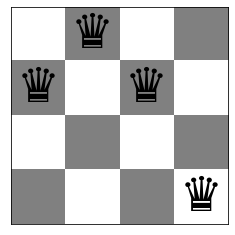

Board with 4 conflicts.


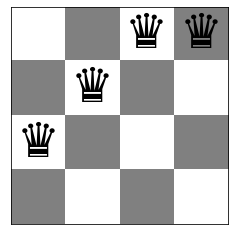

Board with 1 conflicts.


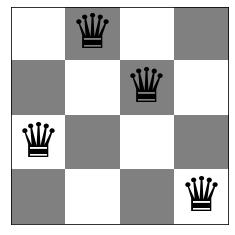

Board with 3 conflicts.


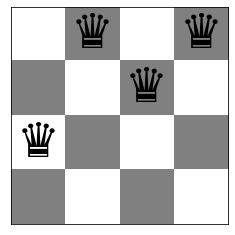

FITNESS: [3, 2, 5, 3]
Board:  0
Board with 3 conflicts.


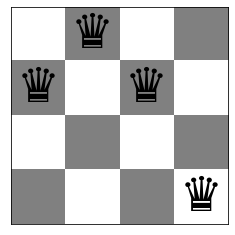

Board:  1
Board with 4 conflicts.


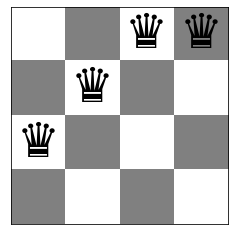

Board:  2
Board with 1 conflicts.


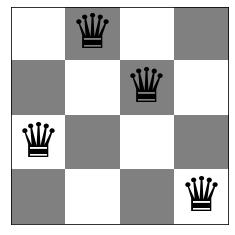

Board:  3
Board with 3 conflicts.


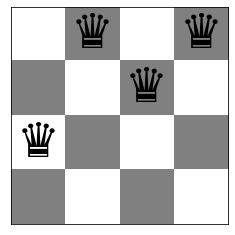

NORMALIZED: [0.23076923076923078, 0.15384615384615385, 0.38461538461538464, 0.23076923076923078]
SELECTION: [0, 0, 2, 2]
SELECTED: [array([1, 0, 1, 3]), array([1, 0, 1, 3]), array([2, 0, 1, 3]), array([2, 0, 1, 3])]
[(array([2, 0, 1, 3]), array([2, 0, 1, 3])), (array([1, 0, 1, 3]), array([1, 0, 1, 3]))]
Board with 2 conflicts.


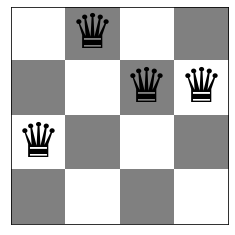

Board with 3 conflicts.


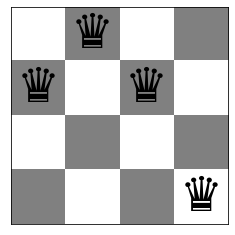

Board with 3 conflicts.


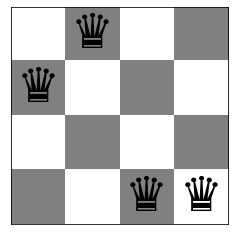

Board with 3 conflicts.


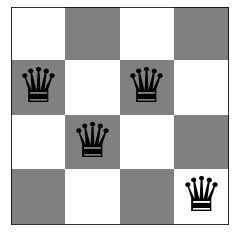

FITNESS: [4, 3, 3, 3]
Board:  0
Board with 2 conflicts.


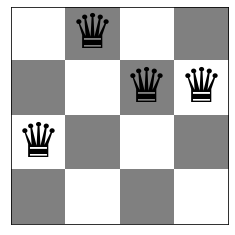

Board:  1
Board with 3 conflicts.


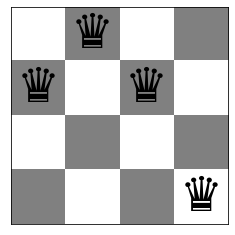

Board:  2
Board with 3 conflicts.


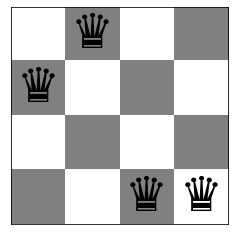

Board:  3
Board with 3 conflicts.


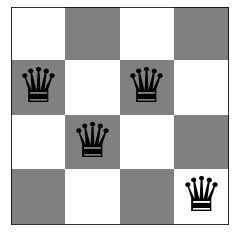

NORMALIZED: [0.3076923076923077, 0.23076923076923078, 0.23076923076923078, 0.23076923076923078]
SELECTION: [2, 1, 0, 2]
SELECTED: [array([1, 0, 3, 3]), array([1, 0, 1, 3]), array([2, 0, 1, 1]), array([1, 0, 3, 3])]
[(array([1, 0, 3, 3]), array([1, 0, 3, 3])), (array([1, 0, 1, 3]), array([2, 0, 1, 1]))]
Board with 4 conflicts.


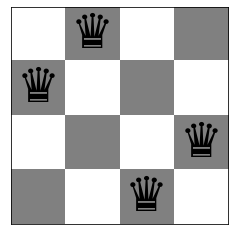

Board with 4 conflicts.


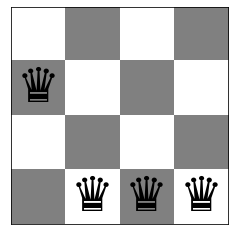

Board with 3 conflicts.


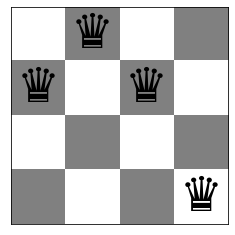

Board with 1 conflicts.


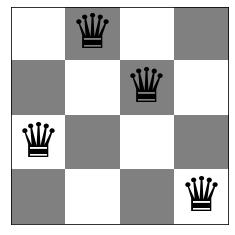

FITNESS: [2, 2, 3, 5]
Board:  0
Board with 4 conflicts.


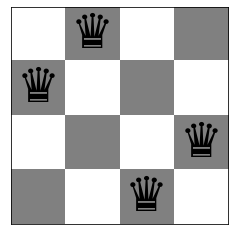

Board:  1
Board with 4 conflicts.


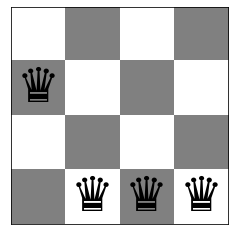

Board:  2
Board with 3 conflicts.


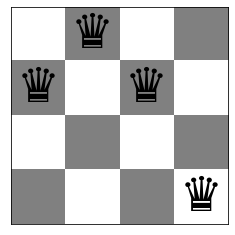

Board:  3
Board with 1 conflicts.


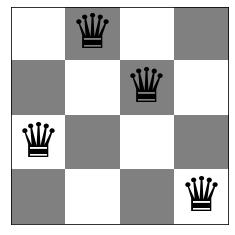

NORMALIZED: [0.16666666666666666, 0.16666666666666666, 0.25, 0.4166666666666667]
SELECTION: [3, 3, 3, 3]
SELECTED: [array([2, 0, 1, 3]), array([2, 0, 1, 3]), array([2, 0, 1, 3]), array([2, 0, 1, 3])]
[(array([2, 0, 1, 3]), array([2, 0, 1, 3])), (array([2, 0, 1, 3]), array([2, 0, 1, 3]))]
Board with 1 conflicts.


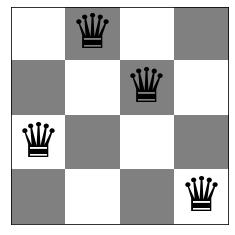

Board with 1 conflicts.


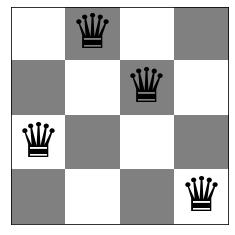

Board with 1 conflicts.


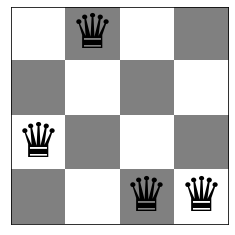

Board with 3 conflicts.


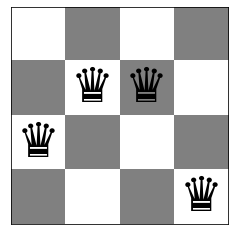

FITNESS: [5, 5, 5, 3]
Board:  0
Board with 1 conflicts.


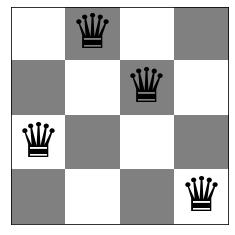

Board:  1
Board with 1 conflicts.


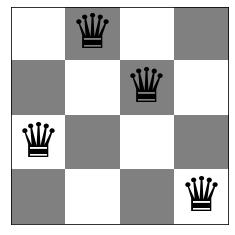

Board:  2
Board with 1 conflicts.


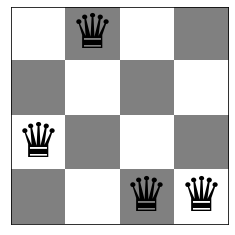

Board:  3
Board with 3 conflicts.


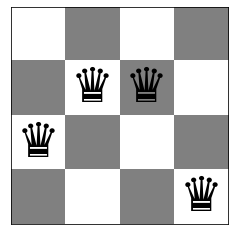

NORMALIZED: [0.2777777777777778, 0.2777777777777778, 0.2777777777777778, 0.16666666666666666]
SELECTION: [2, 1, 1, 2]
SELECTED: [array([2, 0, 3, 3]), array([2, 0, 1, 3]), array([2, 0, 1, 3]), array([2, 0, 3, 3])]
[(array([2, 0, 1, 3]), array([2, 0, 3, 3])), (array([2, 0, 3, 3]), array([2, 0, 1, 3]))]
Board with 1 conflicts.


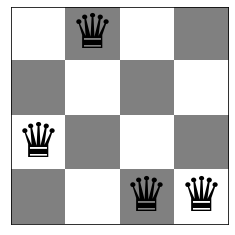

Board with 1 conflicts.


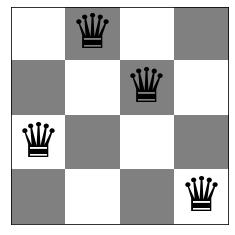

Board with 1 conflicts.


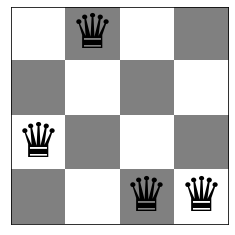

Board with 1 conflicts.


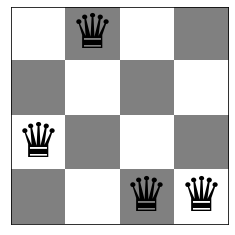

FITNESS: [5, 5, 5, 5]
Board:  0
Board with 1 conflicts.


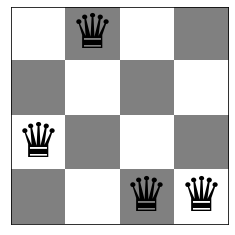

Board:  1
Board with 1 conflicts.


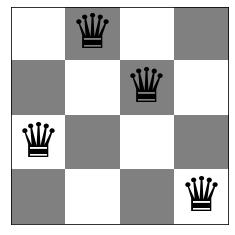

Board:  2
Board with 1 conflicts.


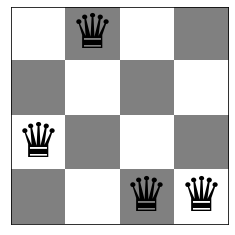

Board:  3
Board with 1 conflicts.


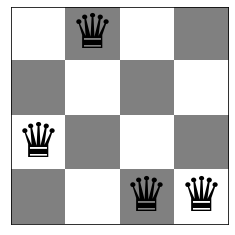

NORMALIZED: [0.25, 0.25, 0.25, 0.25]
SELECTION: [2, 3, 1, 1]
SELECTED: [array([2, 0, 3, 3]), array([2, 0, 3, 3]), array([2, 0, 1, 3]), array([2, 0, 1, 3])]
[(array([2, 0, 1, 3]), array([2, 0, 1, 3])), (array([2, 0, 3, 3]), array([2, 0, 3, 3]))]
Board with 2 conflicts.


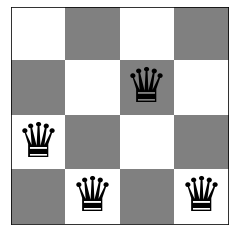

Board with 4 conflicts.


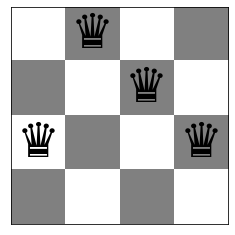

Board with 3 conflicts.


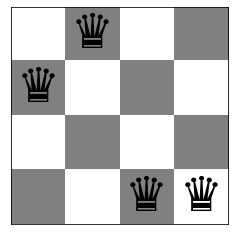

Board with 0 conflicts.


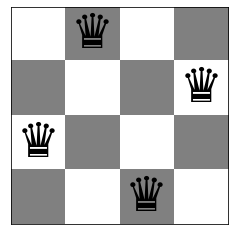

BOARD WITH 0 CONFLICTS [2 0 3 1]


array([2, 0, 3, 1])

In [193]:
def genetic(n=4, pop=4, verb=False):
    # generate (pop) boards of size (nXn)
    boards = [random_board(n) for i in range(pop)]
    maxConflicts = nCr(n, 2)
    for i in range(20):
        fitness = [maxConflicts - conflicts(board) for board in boards]
        if verb: print("FITNESS:", fitness)
        if verb: 
            for i, board in enumerate(boards): 
                print("Board: ", i)
                show_board(board)

        # find their respective conflicts and normalize the numbers to find a percent value
        norm = []
        for i in fitness:
            norm.append((float(i)/sum(fitness)))
        if verb:print("NORMALIZED:", norm)
        # fitness function to determine boards to cross
        selection = [np.random.choice(pop, p=norm) for i in range(pop)]
        print("SELECTION:", selection)
        selected = [boards[i] for i in selection]
        print("SELECTED:", selected)
        # randomly select which boards to cross based on selected boards   
        pairs = []
        while selected:
            idx1 = np.random.randint(0, len(selected))
            rand1 = selected.pop(idx1)
            idx2 = np.random.randint(0, len(selected))
            rand2 = selected.pop(idx2)
            pairs.append((rand1, rand2))
        # randomly select which columns to cross on board pairs
        if verb:print(pairs)
        newBoards = []
        for pair in pairs:
            # generate the cross of the two boards on a single split column
            split = np.random.randint(1, n-1)
            # first pair
            left = pair[0][:split]
            right = pair[1][split:]
            concat = np.concatenate((left, right), axis=None)
            newBoards.append(concat)
            # second pair
            left = pair[1][:split]
            right = pair[0][split:]
            concat = np.concatenate((left, right), axis=None)
            newBoards.append(concat)
        # mutate a single random column 
        finished = False
        boards = newBoards
        for board in newBoards:
            # mutate board with random queen being changed
            index = np.random.randint(0, high=n)
            row = np.random.randint(0, high=n)
            board[index] = row
            show_board(board)
            if conflicts(board) == 0:
                finished = True
                finalBoard = board
                break
        if finished:
            print("BOARD WITH 0 CONFLICTS", board)
            break
    return finalBoard
    
genetic(verb=True)

The genetic algorithm takes in a board of size n and a population (range) for how many boards to use to make pairs of and cross for the algorithm. This number must be even so we have pairs. From my observations, using the weighted probability (fitness function) makes each consecurtive iteration more and more likely to be made of the same board. When crossing two like boards, nothing happens, leaving all future changes to that set of boards to mutation.